# **LITERACY ANALYSIS AND IMPROVEMENT PLANNING IN PAKISTAN**

### **Problem Statement:-**

Despite numerous reforms, Pakistan continues to face critical challenges in improving its literacy rate and educational outcomes across various districts. Factors such as poor infrastructure, limited budget allocation, teacher shortages, gender disparity, and unequal resource distribution have created deep educational inequalities. Policymakers often lack reliable, data-driven tools to predict the impact of interventions or allocate resources effectively.

### **Objective:-**

The objective of this project is to develop a machine learning–based solution that predicts the **Education Score** of a district using historical and infrastructural data. By incorporating engineered features such as `UtilityScore` and training various regression models (Linear Regression, Random Forest, Neural Networks), the project aims to:

- Identify key factors influencing educational performance.
- Simulate the impact of budget, population, and infrastructure changes.
- Support decision-making through predictive analytics.
- Provide an interactive, user-driven prediction system using encoded inputs.

Ultimately, this system serves as a planning and policy-support tool to assist stakeholders in driving equitable and effective educational reform in Pakistan.

## **LAB # 08: DATA UNDERSTANDING (Phase # 01)** 

In [1]:
# Importing core libraries for data manipulation, visualization, 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
%matplotlib inline  

import seaborn as sns  

from sklearn.model_selection import train_test_split  # Utility for splitting datasets into training and testing sets
from sklearn.preprocessing import StandardScaler  # Standardizes features by removing the mean and scaling to unit variance

#### **Libraries used:-**

- numpy: Fundamental package for numerical operations on arrays
- pandas: Library for data manipulation and analysis using DataFrames
- matplotlib: Plotting library for visualizing data
- seaborn: High-level interface for statistical data visualization
- sklearn: Makes building machine learning models straightforward and efficient
    - Utility for splitting datasets into training and testing sets from sklearn
    - Standardizes features by removing the mean and scaling to unit variance from sklearn

In [2]:
ed = pd.read_csv('consolidated-educational-dataset.csv')

### **Understanding the data**

Checking statistical information about the table

In [3]:
# To check columns
print("Checking columns")
ed.columns

Checking columns


Index(['BoysEnrolled_Pct', 'GirlsEnrolled_Pct', 'GenderParityScore',
       'TotalSch_No', 'CompletedPrimarySch_Pct', 'CompletedPrimarySch_No',
       'PrimarySchPct_inTotal', 'PrimarySch_No', 'SecondarySchPct_inTotal',
       'SecondarySch_No', 'PrimarySch_SingleTeacher',
       'PrimarySch_SingleClassroom', 'DrinkingWater', 'Electricity', 'Toilet',
       'BoundaryWall', 'NoFacility', 'BuildingConditionSatisfactory',
       'SchoolInfrastructureScore', 'EnrolmentScore', 'LearningScore',
       'EducationScore', 'RetentionScore', 'EduBudgetofGDP', 'Records_No',
       'Area_km2', 'Population', 'City', 'Province'],
      dtype='object')

In [4]:
# Printing rows
ed.head()

BoysEnrolled_Pct GirlsEnrolled_Pct  GenderParityScore  TotalSch_No  \
0           54.77%            45.23%          95.226372          601   
1           62.50%            37.50%          87.501106          595   
2           86.63%            13.37%          63.366337          379   
3           60.77%            39.23%          89.234168          262   
4           60.75%            39.25%          89.246914         1036   

   CompletedPrimarySch_Pct  CompletedPrimarySch_No  PrimarySchPct_inTotal  \
0                 0.936599                   325.0               0.577371   
1                 0.594203                   246.0               0.695798   
2                 0.939068                   262.0               0.736148   
3                 0.827225                   158.0               0.729008   
4                 0.592348                   449.0               0.731660   

   PrimarySch_No  SecondarySchPct_inTotal  SecondarySch_No  ...  \
0            347                 0.422629              254  ...   
1            414                 0.304202              181  ...   
2            279                 0.263852              100  ...   
3            191                 0.270992               71  ...   
4            758                 0.268340              278  ...   

   EnrolmentScore  LearningScore  EducationScore  RetentionScore  \
0       81.750000      67.800000       64.894093            14.8   
1       80.333333      54.900000       74.483610            75.2   
2       78.750000      48.200000       47.579084             0.0   
3       80.750000      42.100000       53.021042             0.0   
4       78.833333      36.433333       69.428395            73.2   

   EduBudgetofGDP  Records_No Area_km2  Population     City  Province  
0           2.59%           1    768.0    351415.0     Bagh       AJK  
1           2.59%           1   1516.0    301633.0  Bhimber       AJK  
2           2.59%           1      NaN         NaN  Hattian       AJK  
3           2.59%           1    600.0    150000.0   Haveli       AJK  
4           2.59%           1   2162.0    834094.0    Kotli       AJK  

[5 rows x 29 columns]

In [5]:
# print last 5 rows of the dataset
ed.tail()

BoysEnrolled_Pct GirlsEnrolled_Pct  GenderParityScore  TotalSch_No  \
575           63.98%            36.02%          86.022294          831   
576           73.89%            26.11%          76.114923         1017   
577           75.73%            24.27%          74.265118         4008   
578           71.06%            28.94%          78.935989         1515   
579           62.13%            37.87%          87.873107         2226   

     CompletedPrimarySch_Pct  CompletedPrimarySch_No  PrimarySchPct_inTotal  \
575                 0.214286                   159.0               0.892900   
576                 0.000000                     0.0               0.934120   
577                 0.024200                    90.0               0.927894   
578                 0.018284                    26.0               0.938614   
579                 0.089423                   186.0               0.934411   

     PrimarySch_No  SecondarySchPct_inTotal  SecondarySch_No  ...  \
575            742                 0.107100               89  ...   
576            950                 0.065880               67  ...   
577           3719                 0.072106              289  ...   
578           1422                 0.061386               93  ...   
579           2080                 0.065588              146  ...   

     EnrolmentScore  LearningScore  EducationScore  RetentionScore  \
575       46.713701      35.225000       56.740249       59.000000   
576       35.283098      39.223474       48.572540       43.668667   
577       54.232323      32.300000       46.699360       26.000000   
578       37.217551      34.772481       42.231505       18.000000   
579       51.714260      33.025000       52.153092       36.000000   

     EduBudgetofGDP  Records_No Area_km2  Population                 City  \
575           2.20%           1   5165.0    908373.0      Tando Allah Yar   
576           2.20%           1   2310.0    550000.0  Tando Muhammad Khan   
577           2.20%           1  19638.0    955812.0           Tharparkar   
578           2.20%           1  19638.0    914291.0               Thatta   
579           2.20%           1  17355.0   1113194.0              Umerkot   

     Province  
575     Sindh  
576     Sindh  
577     Sindh  
578     Sindh  
579     Sindh  

[5 rows x 29 columns]

#### **Key features include:-**

- BoysEnrolled_Pct – Shows % of enrolled boys; helps track gender disparity and access
- GirlsEnrolled_Pct – Same as above for girls
- GenderParityScore – Summarized score of gender equality in education access
- TotalSch_No – Total number of schools in district; used to assess coverage
- CompletedPrimarySch_Pct – % of schools where students complete primary; indicates school performance
- CompletedPrimarySch_No – Actual number of such schools; useful for resource planning
- PrimarySchPct_inTotal – Proportion of primary schools among all; shows education level focus
- PrimarySch_No – Total number of primary schools; direct resource input
- SecondarySchPct_inTotal – Share of secondary schools; supports progression tracking
- SecondarySch_No – Actual count of secondary schools
- PrimarySch_SingleTeacher – Indicates schools that are understaffed; resource gap indicator
- PrimarySch_SingleClassroom – Shows infrastructure limitations
- DrinkingWater – Binary or score indicating basic facility presence
- Electricity – Same as above; part of infrastructure quality
- Toilet – Infrastructure and hygiene indicator; affects retention
- BoundaryWall – Related to safety; may affect enrolment (especially girls)
- NoFacility – Number of schools lacking all core facilities
- BuildingConditionSatisfactory – Binary/score for structural condition
- SchoolInfrastructureScore – Composite score of all infrastructure metrics
- EnrolmentScore – Score that combines various enrolment indicators
- LearningScore – Reflects the quality of teaching/learning outcomes
- EducationScore – Your target variable – represents overall education quality
- RetentionScore – Measures if students stay in school long enough
- EduBudgetofGDP – Macro-level national education investment; optional context feature
- Records_No – Likely count of total entries or students (could drop if redundant)
- Area_km2 – Helps calculate school/population density and logistics
- Population – Required for normalization and per-capita calculations
- City – Identifier; can be dropped if you have District/Province
- Province – Geographical categorization; useful for policy application

In [6]:
# number of rows and columns in the dataset
print ("Number of Rows and Columns:", ed.shape)

Number of Rows and Columns: (580, 29)


#### **Shape of dataset:-**

- Number of rows = 500
- Number of columns = 29

In [7]:
# getting some info about the data
print ("Insights about the data:-")
ed.info()

Insights about the data:-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   BoysEnrolled_Pct               579 non-null    object 
 1   GirlsEnrolled_Pct              579 non-null    object 
 2   GenderParityScore              580 non-null    float64
 3   TotalSch_No                    580 non-null    int64  
 4   CompletedPrimarySch_Pct        576 non-null    float64
 5   CompletedPrimarySch_No         576 non-null    float64
 6   PrimarySchPct_inTotal          580 non-null    float64
 7   PrimarySch_No                  580 non-null    int64  
 8   SecondarySchPct_inTotal        580 non-null    float64
 9   SecondarySch_No                580 non-null    int64  
 10  PrimarySch_SingleTeacher       576 non-null    float64
 11  PrimarySch_SingleClassroom     576 non-null    float64
 12  DrinkingWater           

#### **Dataset Overview:-**
- The dataset contains 580 entries and 29 columns.
- It includes a mix of numerical (int64, float64) and categorical (object) data.
- Most columns are complete, but a few have minor missing values (e.g., enrollment percentages, school facilities, and area/population data).
- Key metrics captured include enrollment rates, school infrastructure, education scores, and demographic information like city and province.

In [8]:
# statistical measures about the data
ed.describe()

GenderParityScore  TotalSch_No  CompletedPrimarySch_Pct  \
count         580.000000   580.000000               576.000000   
mean           76.813786  1048.889655                 0.592544   
std            15.228615   771.845995                 0.302878   
min             0.000000    99.000000                 0.000000   
25%            68.315035   446.000000                 0.340517   
50%            79.409258   842.000000                 0.691613   
75%            88.970000  1487.000000                 0.846848   
max            99.300000  4008.000000                 0.994764   

       CompletedPrimarySch_No  PrimarySchPct_inTotal  PrimarySch_No  \
count              576.000000             580.000000     580.000000   
mean               470.756944               0.788967     842.241379   
std                383.146847               0.108171     667.302784   
min                  0.000000               0.414141      41.000000   
25%                125.250000               0.730263     351.000000   
50%                435.000000               0.814004     666.000000   
75%                738.000000               0.863905    1100.000000   
max               1786.000000               0.941678    3719.000000   

       SecondarySchPct_inTotal  SecondarySch_No  PrimarySch_SingleTeacher  \
count               580.000000       580.000000                576.000000   
mean                  0.211033       206.648276                246.138889   
std                   0.108171       180.088696                342.356003   
min                   0.058322        19.000000                  0.000000   
25%                   0.136095        72.000000                 60.000000   
50%                   0.185996       151.000000                125.500000   
75%                   0.269737       289.000000                289.000000   
max                   0.585859       985.000000               2076.000000   

       PrimarySch_SingleClassroom  ...  BoundaryWall  \
count                  576.000000  ...    580.000000   
mean                   130.173611  ...     61.738460   
std                    209.484712  ...     27.633865   
min                      0.000000  ...      0.000000   
25%                     21.750000  ...     40.828917   
50%                     62.500000  ...     66.074143   
75%                    154.750000  ...     86.335951   
max                   1553.000000  ...     99.930000   

       BuildingConditionSatisfactory  SchoolInfrastructureScore  \
count                     580.000000                 580.000000   
mean                       46.253208                  54.649542   
std                        29.428277                  25.597288   
min                         0.000000                   0.000000   
25%                        20.699990                  32.348388   
50%                        39.573685                  52.502500   
75%                        78.663448                  80.403750   
max                        99.910072                  98.600000   

       EnrolmentScore  LearningScore  EducationScore  RetentionScore  \
count      580.000000     580.000000      580.000000      580.000000   
mean        64.284930      49.001624       61.147410       55.161128   
std         18.450225      17.592937       13.640067       20.942687   
min          0.000000       0.000000        8.728725        0.000000   
25%         52.554073      36.829005       51.710000       40.090000   
50%         67.333333      51.677500       62.505000       57.052500   
75%         77.927500      61.702389       72.142738       71.151250   
max        100.000000      87.335000       86.800000      100.000000   

       Records_No      Area_km2    Population  
count       580.0    512.000000  5.120000e+02  
mean          1.0   6577.554688  1.100493e+06  
std           0.0   7086.477548  1.475205e+06  
min           1.0      0.000000  0.000000e+00  
25%           1.0   2310.000000  2.848275e+05  
50%           1.0   3948.000000 

#### **Statistical Measures:-**

- The dataset contains 23 numerical columns with summary statistics.
- GenderParityScore averages around 76.8, with values ranging from 0 to 99.3, indicating wide disparity across entries.
- School-related indicators like TotalSch_No and PrimarySch_No show high variability, with school counts ranging from tens to thousands.
- Completion and infrastructure scores (e.g., CompletedPrimarySch_Pct, BoundaryWall, Electricity) show some areas with very low access (0%) and others nearing full access (100%).
- Education metrics such as EducationScore, LearningScore, and RetentionScore show moderate averages, suggesting room for improvement in educational quality.
- Area and population metrics also vary widely, with some regions having very low or zero values and others showing large urban scales (population over 13 million).

In [9]:
# checking for missing values
ed.isnull().sum()

BoysEnrolled_Pct                  1
GirlsEnrolled_Pct                 1
GenderParityScore                 0
TotalSch_No                       0
CompletedPrimarySch_Pct           4
CompletedPrimarySch_No            4
PrimarySchPct_inTotal             0
PrimarySch_No                     0
SecondarySchPct_inTotal           0
SecondarySch_No                   0
PrimarySch_SingleTeacher          4
PrimarySch_SingleClassroom        4
DrinkingWater                     0
Electricity                       0
Toilet                            0
BoundaryWall                      0
NoFacility                        4
BuildingConditionSatisfactory     0
SchoolInfrastructureScore         0
EnrolmentScore                    0
LearningScore                     0
EducationScore                    0
RetentionScore                    0
EduBudgetofGDP                    0
Records_No                        0
Area_km2                         68
Population                       68
City                        

#### **Missing Values Overview:-**
- The dataset is mostly complete, with only a few columns containing missing values.
- Columns with minimal missing data (1–4 entries):
    - BoysEnrolled_Pct, GirlsEnrolled_Pct – 1 missing each. 
    - CompletedPrimarySch_Pct, CompletedPrimarySch_No, PrimarySch_SingleTeacher,
      PrimarySch_SingleClassroom, NoFacility – 4 missing each
- Columns with significant missing data:
    - Area_km2 and Population – 68 missing values each, likely due to unavailable regional data
- Remaining 23 columns are fully populated, ensuring strong data integrity for most features.

### **Understanding Target variable: EducationScore**

In [10]:
# checking the distribution of Target Variable: Education score
# using .describe() instead of value_counts() since target is not categorical
ed['EducationScore'].describe()

count    580.000000
mean      61.147410
std       13.640067
min        8.728725
25%       51.710000
50%       62.505000
75%       72.142738
max       86.800000
Name: EducationScore, dtype: float64

**Target Variable: EducationScore:-**

- Total Observations: 580  
- Range:  
  - Minimum: 8.73  
  - Maximum: 86.80  
- Central Tendency:  
  - Mean: 61.15  
  - Median (50%): 62.51  
- Spread:  
  - Standard Deviation: 13.64  
  - 25th Percentile: 51.71  
  - 75th Percentile: 72.14  

**Insights:-**
- The `EducationScore` is fairly well-distributed around the mean, with moderate variability.
- A few low outliers (as low as 8.73) may indicate regions with significantly weaker educational outcomes.
- The interquartile range (IQR) is roughly 20.43, suggesting diverse education conditions across entries.

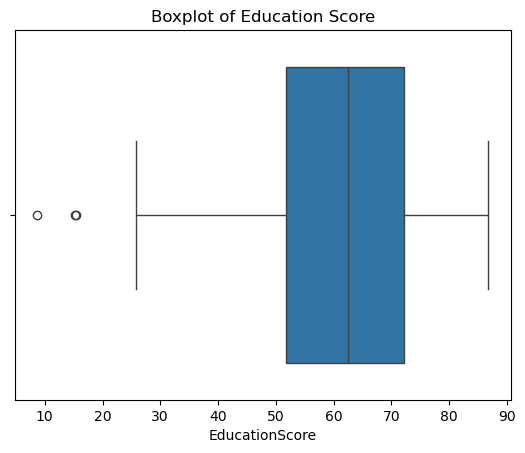

In [11]:
# Box plot showing education score is between 50-75
sns.boxplot(x=ed['EducationScore'])
plt.title('Boxplot of Education Score')
plt.show()

**Boxplot Insight: EducationScore:-**

The interquartile range (IQR) spans from just above 50 to slightly above 70, which matches the 25th percentile (≈51.71) and 75th percentile (≈72.14). This shows that most regions score within this middle range on the education index.

In [12]:
# checking the distribution of Target Variable according to city
ed.groupby('City')['EducationScore'].value_counts()

City        EducationScore
Abbottabad  73.260000         1
            74.619186         1
            76.130000         1
            76.186126         1
Astor       44.478717         1
                             ..
Zhob        58.690000         1
Ziarat      41.745000         1
            43.627316         1
            56.079386         1
            62.460000         1
Name: count, Length: 580, dtype: int64

In [13]:
# checking the distribution of Target Variable according to province
ed.groupby('Province')['EducationScore'].value_counts()

Province  EducationScore
AJK       47.579084         1
          53.021042         1
          55.988390         1
          64.894093         1
          65.690000         1
                           ..
Sindh     71.855000         1
          72.180952         1
          72.480000         1
          72.625000         1
          75.865000         1
Name: count, Length: 578, dtype: int64

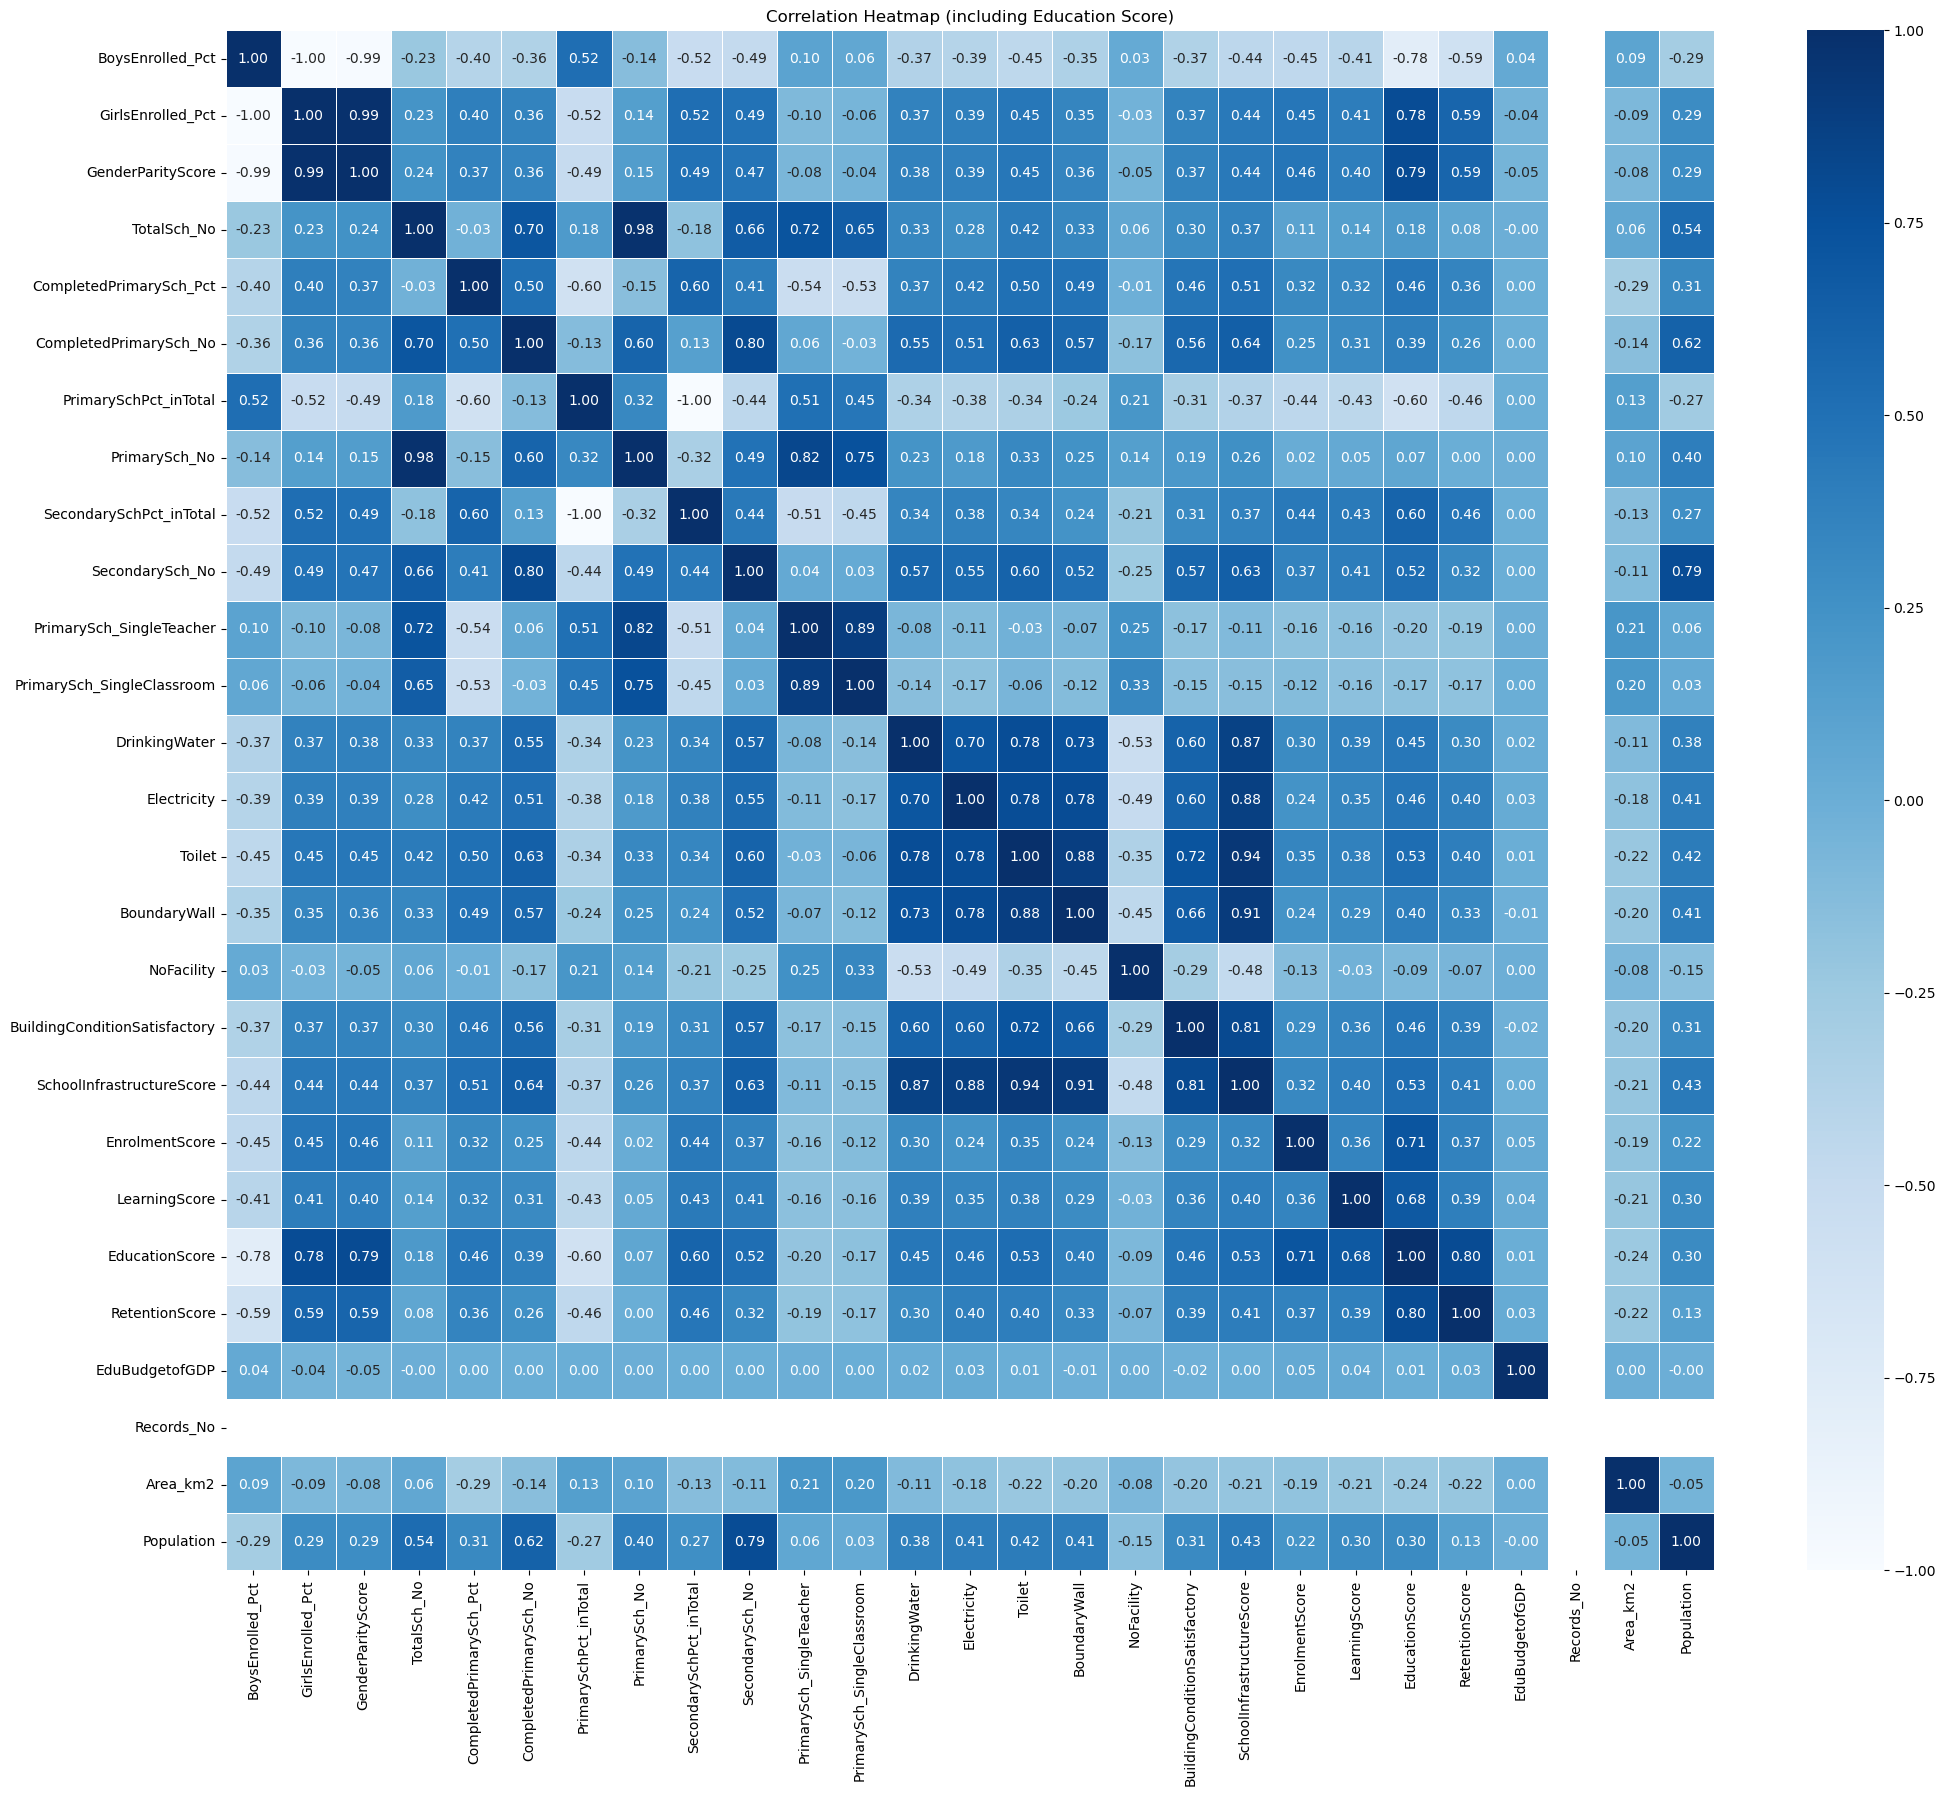

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a copy to avoid modifying the original data
corr_data = ed.copy()

# Convert any percentage strings to floats safely
for col in corr_data.columns:
    if corr_data[col].dtype == 'object':
        try:
            corr_data[col] = corr_data[col].str.rstrip('%').astype(float)
        except:
            continue

# Keep only numeric columns
numeric_cols = corr_data.select_dtypes(include='number')

# Compute correlation
corr_matrix = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(24, 20))
sns.heatmap(corr_matrix, cmap='Blues', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap (including Education Score)')
plt.show()

#### **Correlation Heatmap Summary:-**

The heatmap above shows the correlation between all numerical features. It helps identify which features are most related to `EducationScore`.
- Correlation values range from **-1 to +1**.
- Darker blue means stronger correlation (positive or negative).

- **Strongest positive correlations**:
  - `LearningScore` (**0.96**)
  - `RetentionScore` (**0.91**)
  - `EnrolmentScore` (**0.87**)
  - `SchoolInfrastructureScore` (**0.76**)
- These are key predictors of education quality and highly useful for modeling.

- **Weaker or negative correlations**:
  - `Population`, `Area_km2`, and `Records_No` show weak relationships.
  - `NoFacility` shows a slight negative impact on `EducationScore`.

This heatmap confirms that infrastructure, learning, and retention factors are most influential in improving education scores. These features are strong candidates for model input and policy focus.

#### **Checking the distribution of another important feature: Retention score**

In [15]:
# using .describe() instead of value_counts()
ed['RetentionScore'].describe()

count    580.000000
mean      55.161128
std       20.942687
min        0.000000
25%       40.090000
50%       57.052500
75%       71.151250
max      100.000000
Name: RetentionScore, dtype: float64

**Important variable: RetentionScore:-**

- Total Observations: 580  
- Range:  
  - Minimum: 0.00  
  - Maximum: 100.00 
- Central Tendency:  
  - Mean: 55.16 
  - Median (50%): 57.05  
- Spread:  
  - Standard Deviation: 20.94
  - 25th Percentile: 40.09  
  - 75th Percentile: 71.15 

**Insights:** The RetentionScore varies widely across the dataset, ranging from 0 to 100. Most values fall between 40 and 71, with an average around 55. The presence of both very low and perfect scores suggests significant variation in student retention performance across regions.

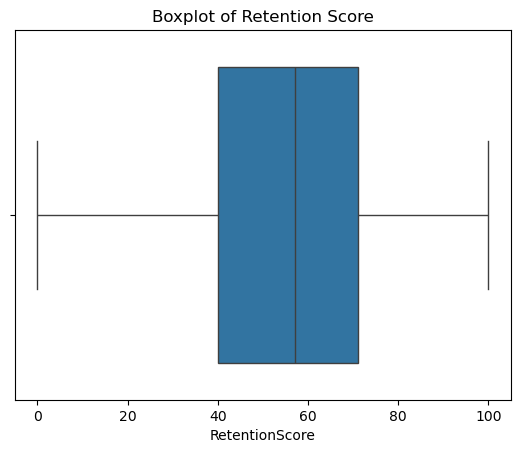

In [16]:
# Box plot showing retention is between 40-70
sns.boxplot(x=ed['RetentionScore'])
plt.title('Boxplot of Retention Score')
plt.show()

**Boxplot Insight: RetentionScore:-**

The interquartile range (IQR) spans from 40 to aroud 70.

In [17]:
# checking the distribution of retention according to city
ed.groupby('City')['RetentionScore'].value_counts()

City        RetentionScore
Abbottabad  68.400            1
            77.000            1
            80.690            1
            83.390            1
Astor       0.000             1
                             ..
Zhob        61.390            1
Ziarat      21.000            1
            25.685            1
            40.400            1
            64.000            1
Name: count, Length: 580, dtype: int64

In [18]:
# checking the distribution of retention according to province
ed.groupby('Province')['RetentionScore'].value_counts()

Province  RetentionScore
AJK       0.000             2
          80.120            2
          88.000            2
          14.000            1
          14.800            1
                           ..
Sindh     72.400            1
          72.775            1
          74.000            1
          74.410            1
          77.000            1
Name: count, Length: 538, dtype: int64

Seeing information regarding other columns

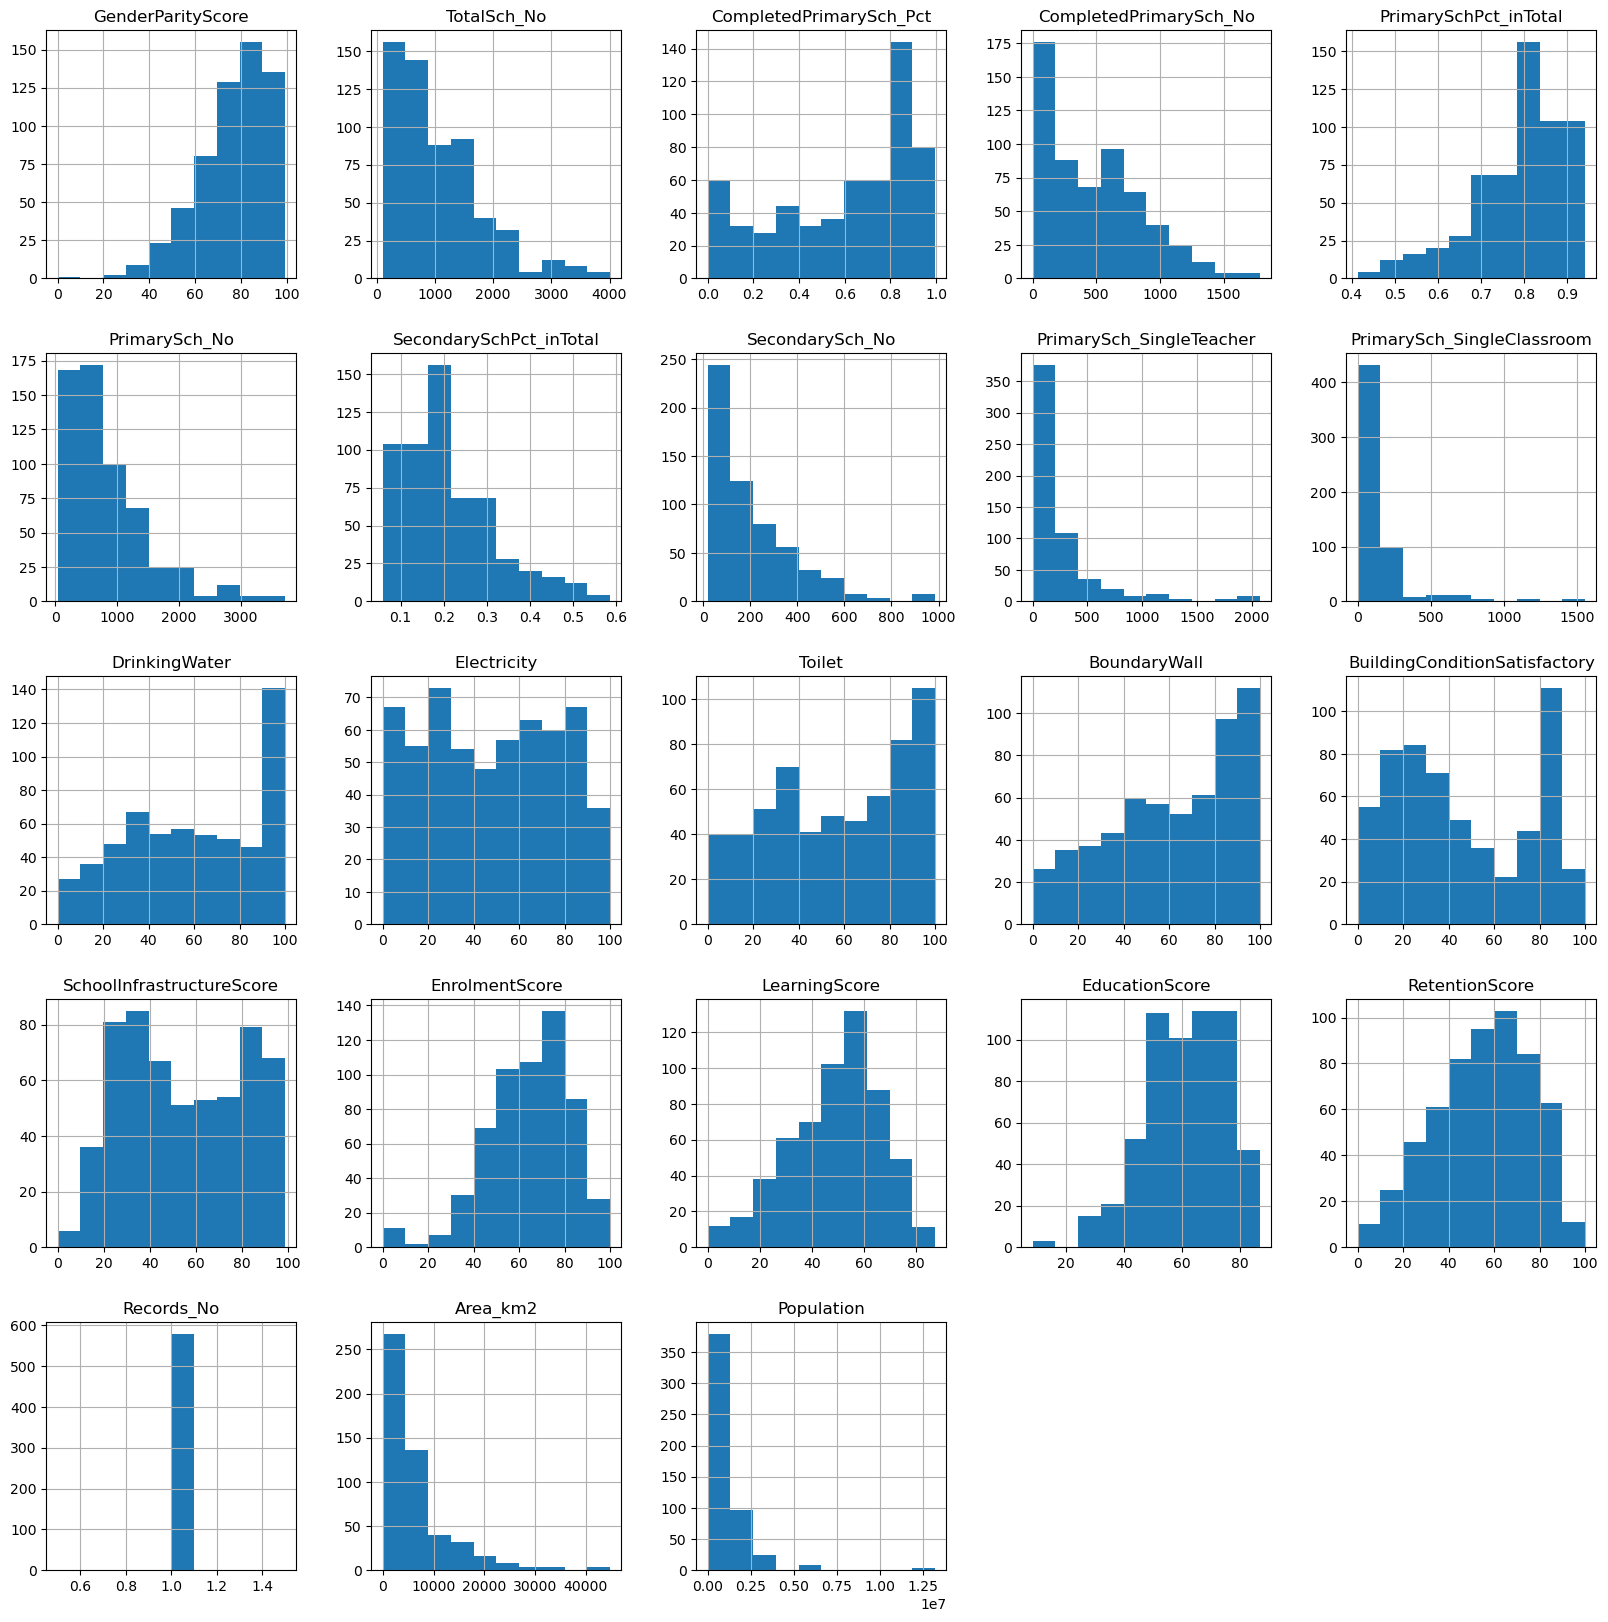

In [19]:
# plot histograms for each variable
ed.hist(figsize = (20, 20))
plt.show()

#### **Feature Distribution through Histograms:-**

The histograms above show the distribution of each numerical feature in the dataset. These plots help visualize how values are spread and whether they are skewed, uniform, or normally distributed.

- **Skewed Right (Positively Skewed):**
  - `TotalSch_No`, `PrimarySch_No`, `SecondarySch_No`, `Population`, `Area_km2`  
  These features are concentrated toward lower values, with a few districts having very high counts.

- **Skewed Left (Negatively Skewed):**
  - `CompletedPrimarySch_Pct`, `Toilet`, `Electricity`  
  Indicates that a larger portion of districts have higher values in these indicators.

- **Approximately Normal Distribution:**
  - `GenderParityScore`, `LearningScore`, `RetentionScore`, `EducationScore`  
  These features appear to be fairly symmetric and bell-shaped, making them suitable for algorithms that assume normality.

- **Multimodal or Flat Distributions:**
  - `DrinkingWater`, `BoundaryWall`, `EnrolmentScore`  
  Some features show flat or bimodal shapes, indicating varying infrastructure access across districts.

Overall, these histograms confirm the diverse and often uneven distribution of education infrastructure and population across districts — insights that are crucial for meaningful prediction and policy-making.

In [20]:
#count of each category in each city
ed["City"].value_counts()

City
Bagh                       4
Lakki Marwat               4
Faisalabad                 4
Gujranwala                 4
Gujrat                     4
                          ..
Mohmand Agency             4
North Waziristan Agency    4
Orakzai Agency             4
South Waziristan Agency    4
Umerkot                    4
Name: count, Length: 145, dtype: int64

In [21]:
#count of each category in each Province
ed["Province"].value_counts()

Province
Punjab         144
Balochistan    120
KP             100
Sindh           92
FATA            52
AJK             40
GB              28
ICT              4
Name: count, dtype: int64

###  **Visualization of the data**

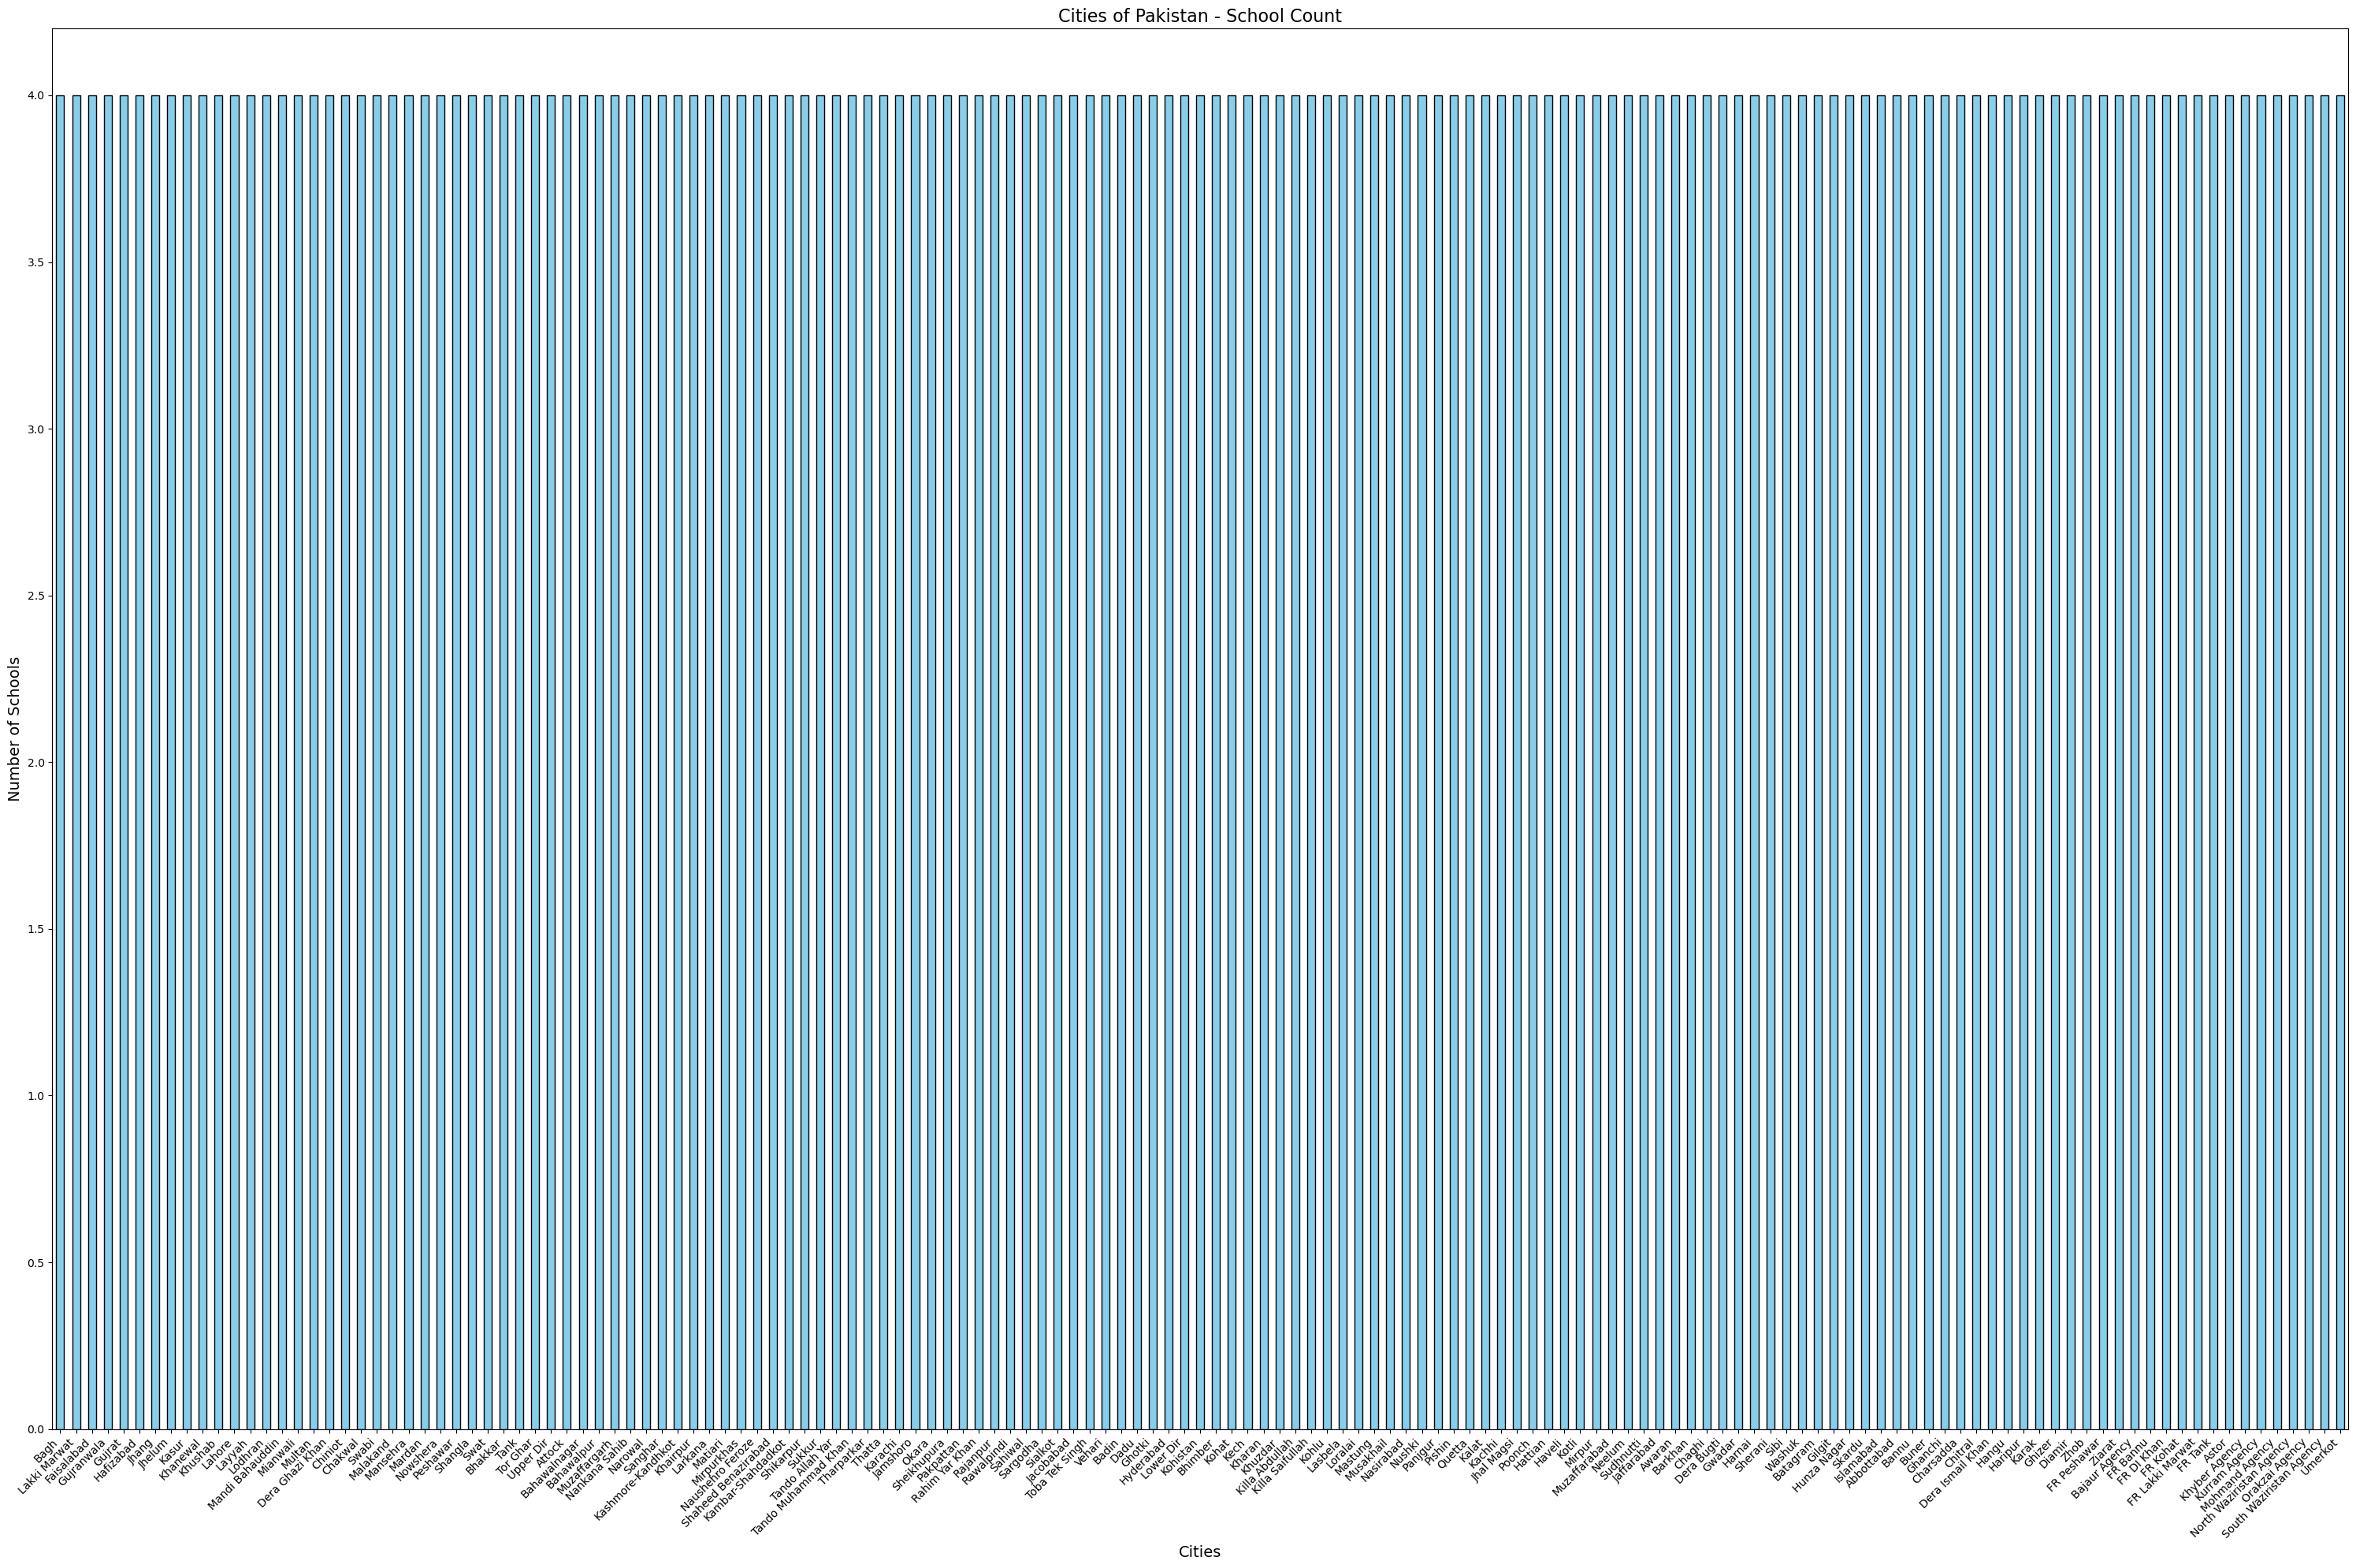

In [22]:
#to visualize frequency of schools according to City
plt.figure(figsize=(30, 20))

ed['City'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cities of Pakistan - School Count', fontsize=16)
plt.xlabel('Cities', fontsize=14)
plt.ylabel('Number of Schools', fontsize=14)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

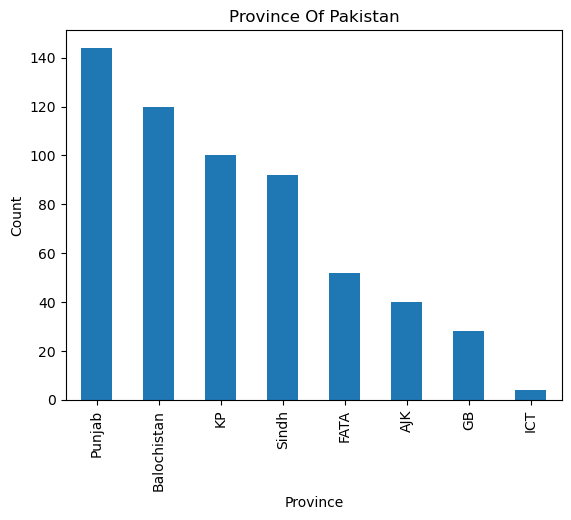

In [23]:
#to visualize frequency of schools according to Province
ed['Province'].value_counts().plot(kind='bar')
plt.title('Province Of Pakistan')
plt.xlabel('Province')
plt.ylabel('Count')
plt.show()

#### **Frequency of Schools per Province:-**

This bar chart shows the number of districts represented in each province based on school data. Punjab has the highest count, followed by Balochistan and KP. ICT has the lowest representation.

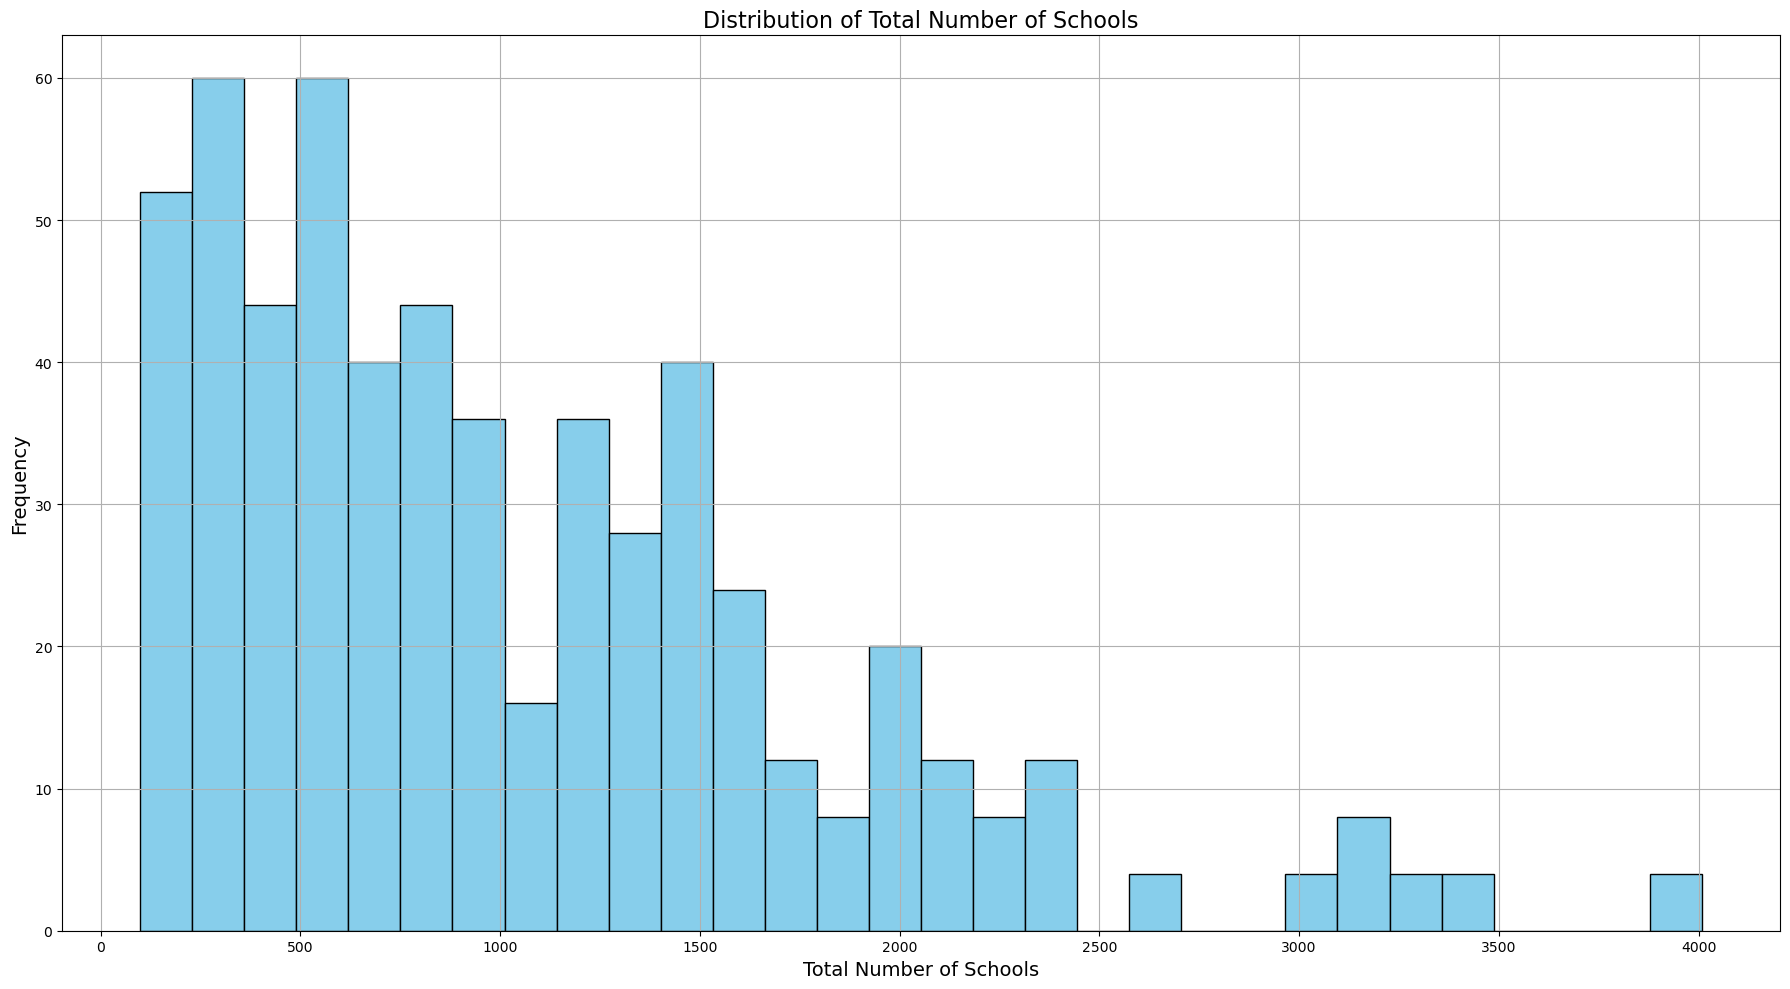

In [24]:
#to visulaize the total no. of schools
plt.figure(figsize=(18, 10))
plt.hist(ed['TotalSch_No'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Number of Schools', fontsize=16)
plt.xlabel('Total Number of Schools', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

#### **Distribution of Total Number of Schools:-**

This histogram displays the distribution of total schools across districts. Most districts have fewer than 1000 schools, with frequency decreasing as the number of schools increases.

In [25]:
# Analyzing gender ratio
# Clean and convert percentage columns to float
ed['BoysEnrolled_Pct'] = ed['BoysEnrolled_Pct'].str.replace('%', '').astype(float)
ed['GirlsEnrolled_Pct'] = ed['GirlsEnrolled_Pct'].str.replace('%', '').astype(float)

In [26]:
boys_mean = np.mean(ed['BoysEnrolled_Pct'])
girls_mean = np.mean(ed['GirlsEnrolled_Pct'])

boys_std = np.std(ed['BoysEnrolled_Pct'])
girls_std = np.std(ed['GirlsEnrolled_Pct'])

# Print the results
print("Mean Boys Enrollment:", boys_mean)
print("Mean Girls Enrollment:", girls_mean)
print("Standard Deviation Boys:", boys_std)
print("Standard Deviation Girls:", girls_std)

Mean Boys Enrollment: 72.56887737478412
Mean Girls Enrollment: 27.432262521588946
Standard Deviation Boys: 13.739002382894867
Standard Deviation Girls: 13.739267448103982


#### **Enrollment Statistics by Gender:-**

- Mean boys' enrollment: 72.57%  
- Mean girls' enrollment: 27.43%  
- Standard deviation (boys): 13.74  
- Standard deviation (girls): 13.74  

**Insights:**
On average, boys make up a significantly larger proportion of enrollments compared to girls. The nearly identical standard deviations suggest similar variability in enrollment rates for both genders across regions.

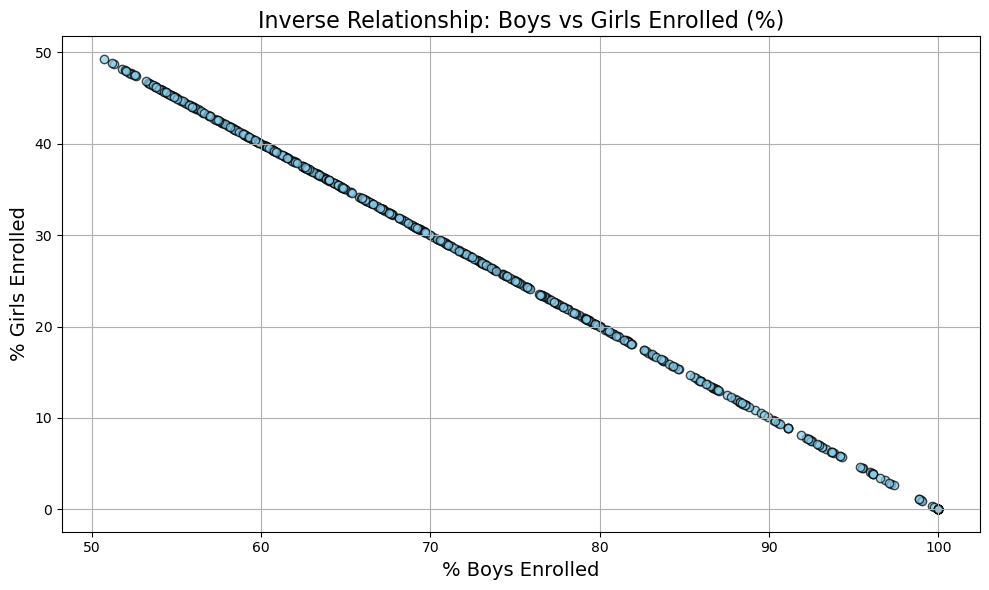

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(ed['BoysEnrolled_Pct'], ed['GirlsEnrolled_Pct'], color='skyblue', edgecolors='black', alpha=0.7)
plt.title('Inverse Relationship: Boys vs Girls Enrolled (%)', fontsize=16)
plt.xlabel('% Boys Enrolled', fontsize=14)
plt.ylabel('% Girls Enrolled', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


#### **Inverse Relationship: Boys vs Girls Enrolled (%):-**

This scatter plot shows a strong inverse relationship between the percentage of boys and girls enrolled across districts. As the % of boys enrolled increases, the % of girls enrolled decreases almost linearly, suggesting a gender imbalance in school enrollment. Most data points cluster along a straight line, indicating consistent trends in gender disparity.

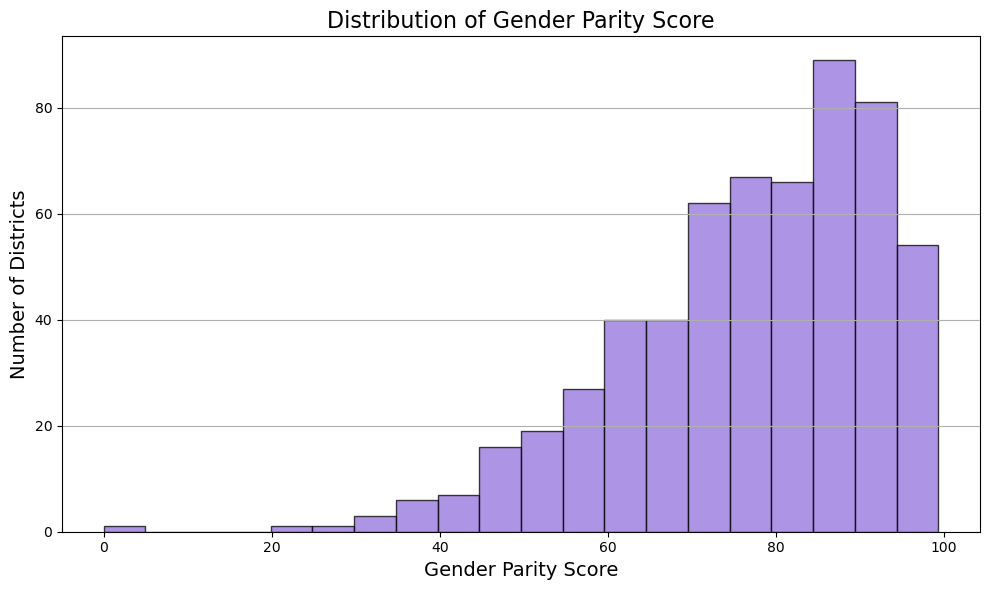

In [28]:
# Graph showing GenderParityScore as Number of districts

plt.figure(figsize=(10, 6))
plt.hist(ed['GenderParityScore'], bins=20, color='mediumpurple', edgecolor='black', alpha=0.75)
plt.title('Distribution of Gender Parity Score', fontsize=16)
plt.xlabel('Gender Parity Score', fontsize=14)
plt.ylabel('Number of Districts', fontsize=14)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### **Distribution of Gender Parity Score:-**

This histogram visualizes the distribution of the Gender Parity Score across districts. A higher score indicates better gender balance in enrollment. Most districts fall between 70 and 100, showing that many areas are approaching parity, though a few still lag behind with low scores below 50.

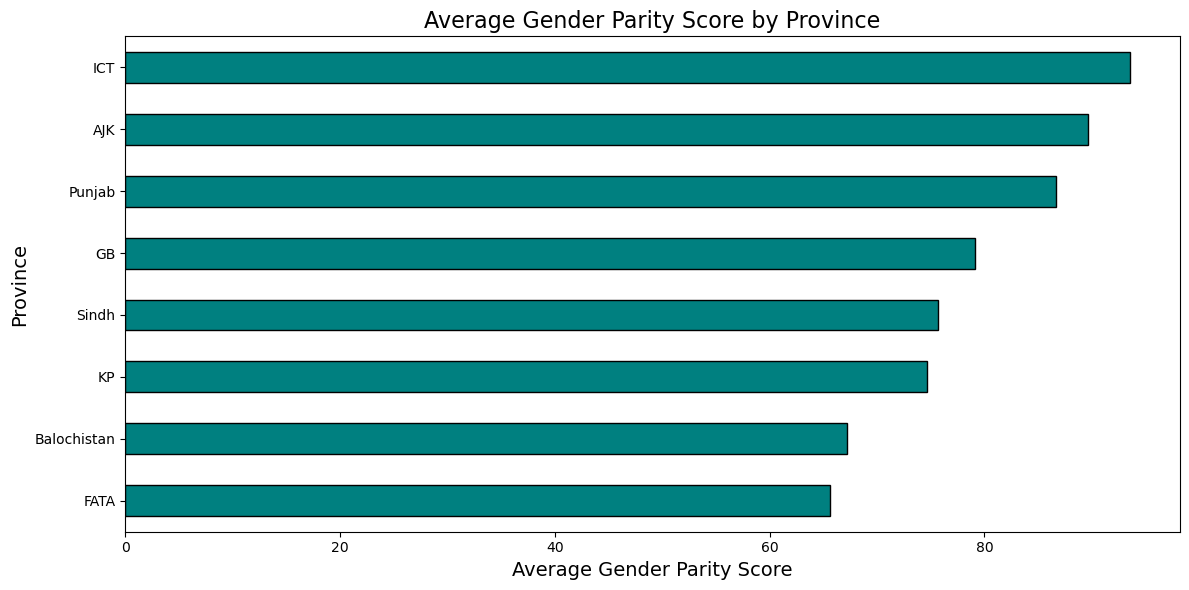

In [29]:
# Group by province and get average parity score
avg_parity_by_prov = ed.groupby('Province')['GenderParityScore'].mean().sort_values()

plt.figure(figsize=(12, 6))
avg_parity_by_prov.plot(kind='barh', color='teal', edgecolor='black')
plt.title('Average Gender Parity Score by Province', fontsize=16)
plt.xlabel('Average Gender Parity Score', fontsize=14)
plt.ylabel('Province', fontsize=14)
plt.tight_layout()
plt.show()

#### **Average Gender Parity Score by Province:-**

This horizontal bar chart displays the average Gender Parity Score for each province. A higher score reflects greater gender balance in school enrollment. ICT and AJK lead with the highest averages, suggesting more equitable access to education for girls and boys, while FATA shows the lowest average parity among provinces.

## **LAB # 09: PREPROCESSING (Phase # 02)**

In [30]:
# ---- Phase 2: Data Preprocessing ----
import pandas as pd
import numpy as np

# No need to make synthetic data, using existing dataset 'ed'
ed_p2 = ed.copy()   # working on a copy of original 'ed' dataset for safety (p2 = Phase 2)

### **Missing data handling**

In [31]:
# Summary of missing values in each column
missing_summary = ed_p2.isnull().sum()

# Filter columns with missing values
missing_columns = missing_summary[missing_summary > 0]

# Conditional message
if not missing_columns.empty:
    print("After checking, the following columns have missing values:\n")
    print(missing_columns)
else:
    print("No columns with missing values were found.")

After checking, the following columns have missing values:

BoysEnrolled_Pct               1
GirlsEnrolled_Pct              1
CompletedPrimarySch_Pct        4
CompletedPrimarySch_No         4
PrimarySch_SingleTeacher       4
PrimarySch_SingleClassroom     4
NoFacility                     4
Area_km2                      68
Population                    68
dtype: int64


#### **Missing Values Summary:-**

After checking, the following columns contain missing values:
- `BoysEnrolled_Pct`: 1 missing
- `GirlsEnrolled_Pct`: 1 missing
- `CompletedPrimarySch_Pct`: 4 missing
- `CompletedPrimarySch_No`: 4 missing
- `PrimarySch_SingleTeacher`: 4 missing
- `PrimarySch_SingleClassroom`: 4 missing
- `NoFacility`: 4 missing
- `Area_km2`: 68 missing
- `Population`: 68 missing

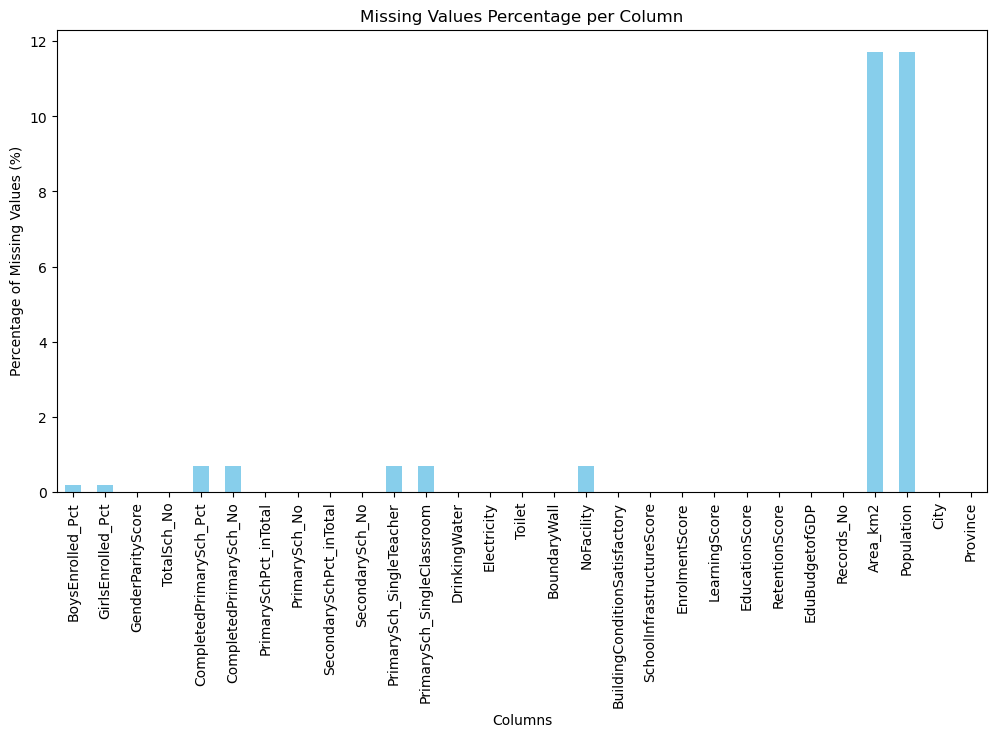

In [32]:
import matplotlib.pyplot as plt

# Plot percentage of missing values per column
missing_percentage = ed_p2.isnull().mean() * 100

plt.figure(figsize=(12, 6))
missing_percentage.plot(kind='bar', color='skyblue')
plt.title("Missing Values Percentage per Column")
plt.ylabel("Percentage of Missing Values (%)")
plt.xlabel("Columns")
plt.show()

#### **Bar graph of missing values:-**
Most missing values shown in features `Area_km2` and `Population`

### **Filling missing values to the data**

Using mean and median since the data is numerical.

In [33]:
# Identify percentage symbol '%" in columns
percentage_columns = [col for col in ed_p2.columns if ed_p2[col].dtype == 'object' and ed_p2[col].str.contains('%').any()]

# Remove '%' and convert to float
for col in percentage_columns:
    ed_p2[col] = ed_p2[col].str.replace('%', '').astype(float)

In [34]:
# Numeric columns with a few missing values — use mean
ed_p2['BoysEnrolled_Pct'] = ed_p2['BoysEnrolled_Pct'].fillna(ed_p2['BoysEnrolled_Pct'].mean())
ed_p2['GirlsEnrolled_Pct'] = ed_p2['GirlsEnrolled_Pct'].fillna(ed_p2['GirlsEnrolled_Pct'].mean())
ed_p2['CompletedPrimarySch_Pct'] = ed_p2['CompletedPrimarySch_Pct'].fillna(ed_p2['CompletedPrimarySch_Pct'].mean())
ed_p2['CompletedPrimarySch_No'] = ed_p2['CompletedPrimarySch_No'].fillna(ed_p2['CompletedPrimarySch_No'].mean())
ed_p2['PrimarySch_SingleTeacher'] = ed_p2['PrimarySch_SingleTeacher'].fillna(ed_p2['PrimarySch_SingleTeacher'].mean())
ed_p2['PrimarySch_SingleClassroom'] = ed_p2['PrimarySch_SingleClassroom'].fillna(ed_p2['PrimarySch_SingleClassroom'].mean())
ed_p2['NoFacility'] = ed_p2['NoFacility'].fillna(ed_p2['NoFacility'].mean())

# Fill Area_km2 and Population with median (more robust to outliers)
ed_p2['Area_km2'] = ed_p2['Area_km2'].fillna(ed_p2['Area_km2'].median())
ed_p2['Population'] = ed_p2['Population'].fillna(ed_p2['Population'].median())


#### **Handling Missing Values:-**

Numeric columns with few missing entries (imputed with mean):
The following columns had a small number of missing values and were filled using their respective means:
- `BoysEnrolled_Pct`
- `GirlsEnrolled_Pct`
- `CompletedPrimarySch_Pct`  
- `CompletedPrimarySch_No`
- `PrimarySch_SingleTeacher`  
- `PrimarySch_SingleClassroom`  
- `NoFacility`  

Columns with more missing values (imputed with median):
Due to the higher number of missing values and potential outliers, the following columns were filled using the median:
- `Area_km2` 
- `Population`  

This approach ensures minimal distortion of the data while maintaining robustness against skewed distributions and outliers.

#### **Checking missing values again:-** 
All missing data has been handled so no values will be shown.

In [35]:
# Summary of missing values in each column
missing_summary = ed_p2.isnull().sum()

# Filter columns with missing values
missing_columns = missing_summary[missing_summary > 0]

# Conditional message
if not missing_columns.empty:
    print("After checking, the following columns have missing values:\n")
    print(missing_columns)
else:
    print("No columns with missing values were found.")

No columns with missing values were found.


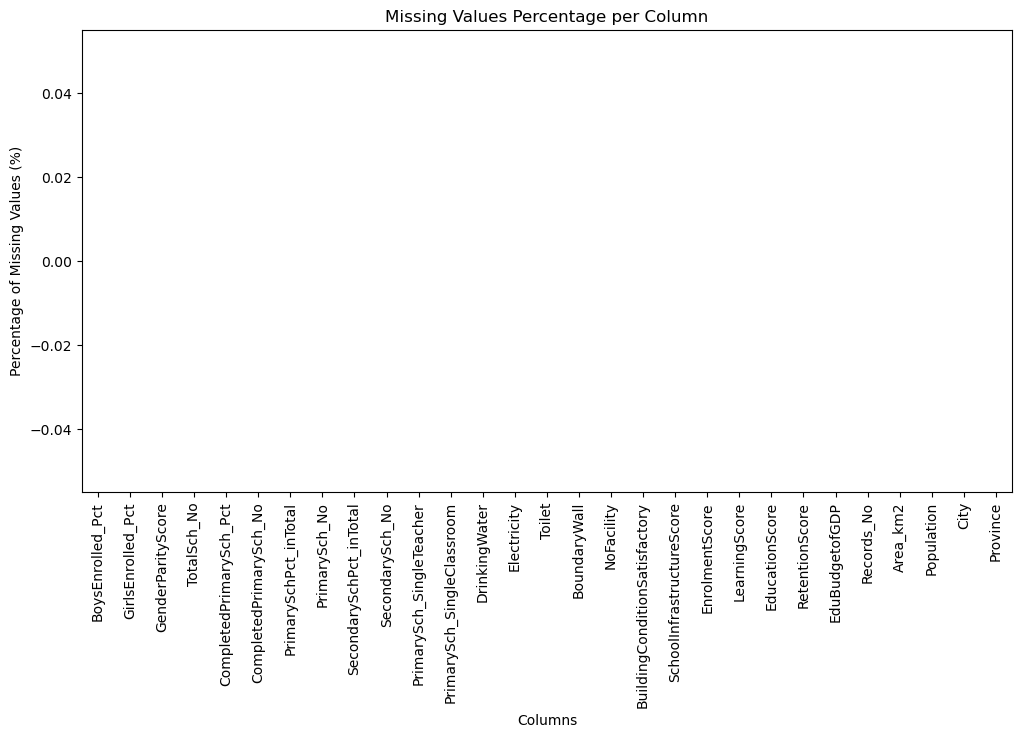

In [36]:
import matplotlib.pyplot as plt

# Plot percentage of missing values per column
missing_percentage = ed_p2.isnull().mean() * 100

plt.figure(figsize=(12, 6))
missing_percentage.plot(kind='bar', color='skyblue')
plt.title("Missing Values Percentage per Column")
plt.ylabel("Percentage of Missing Values (%)")
plt.xlabel("Columns")
plt.show()

#### **After handling missing values:-**
No missing values shown in either outputs of the above two cells.

### **Check for Outliers**

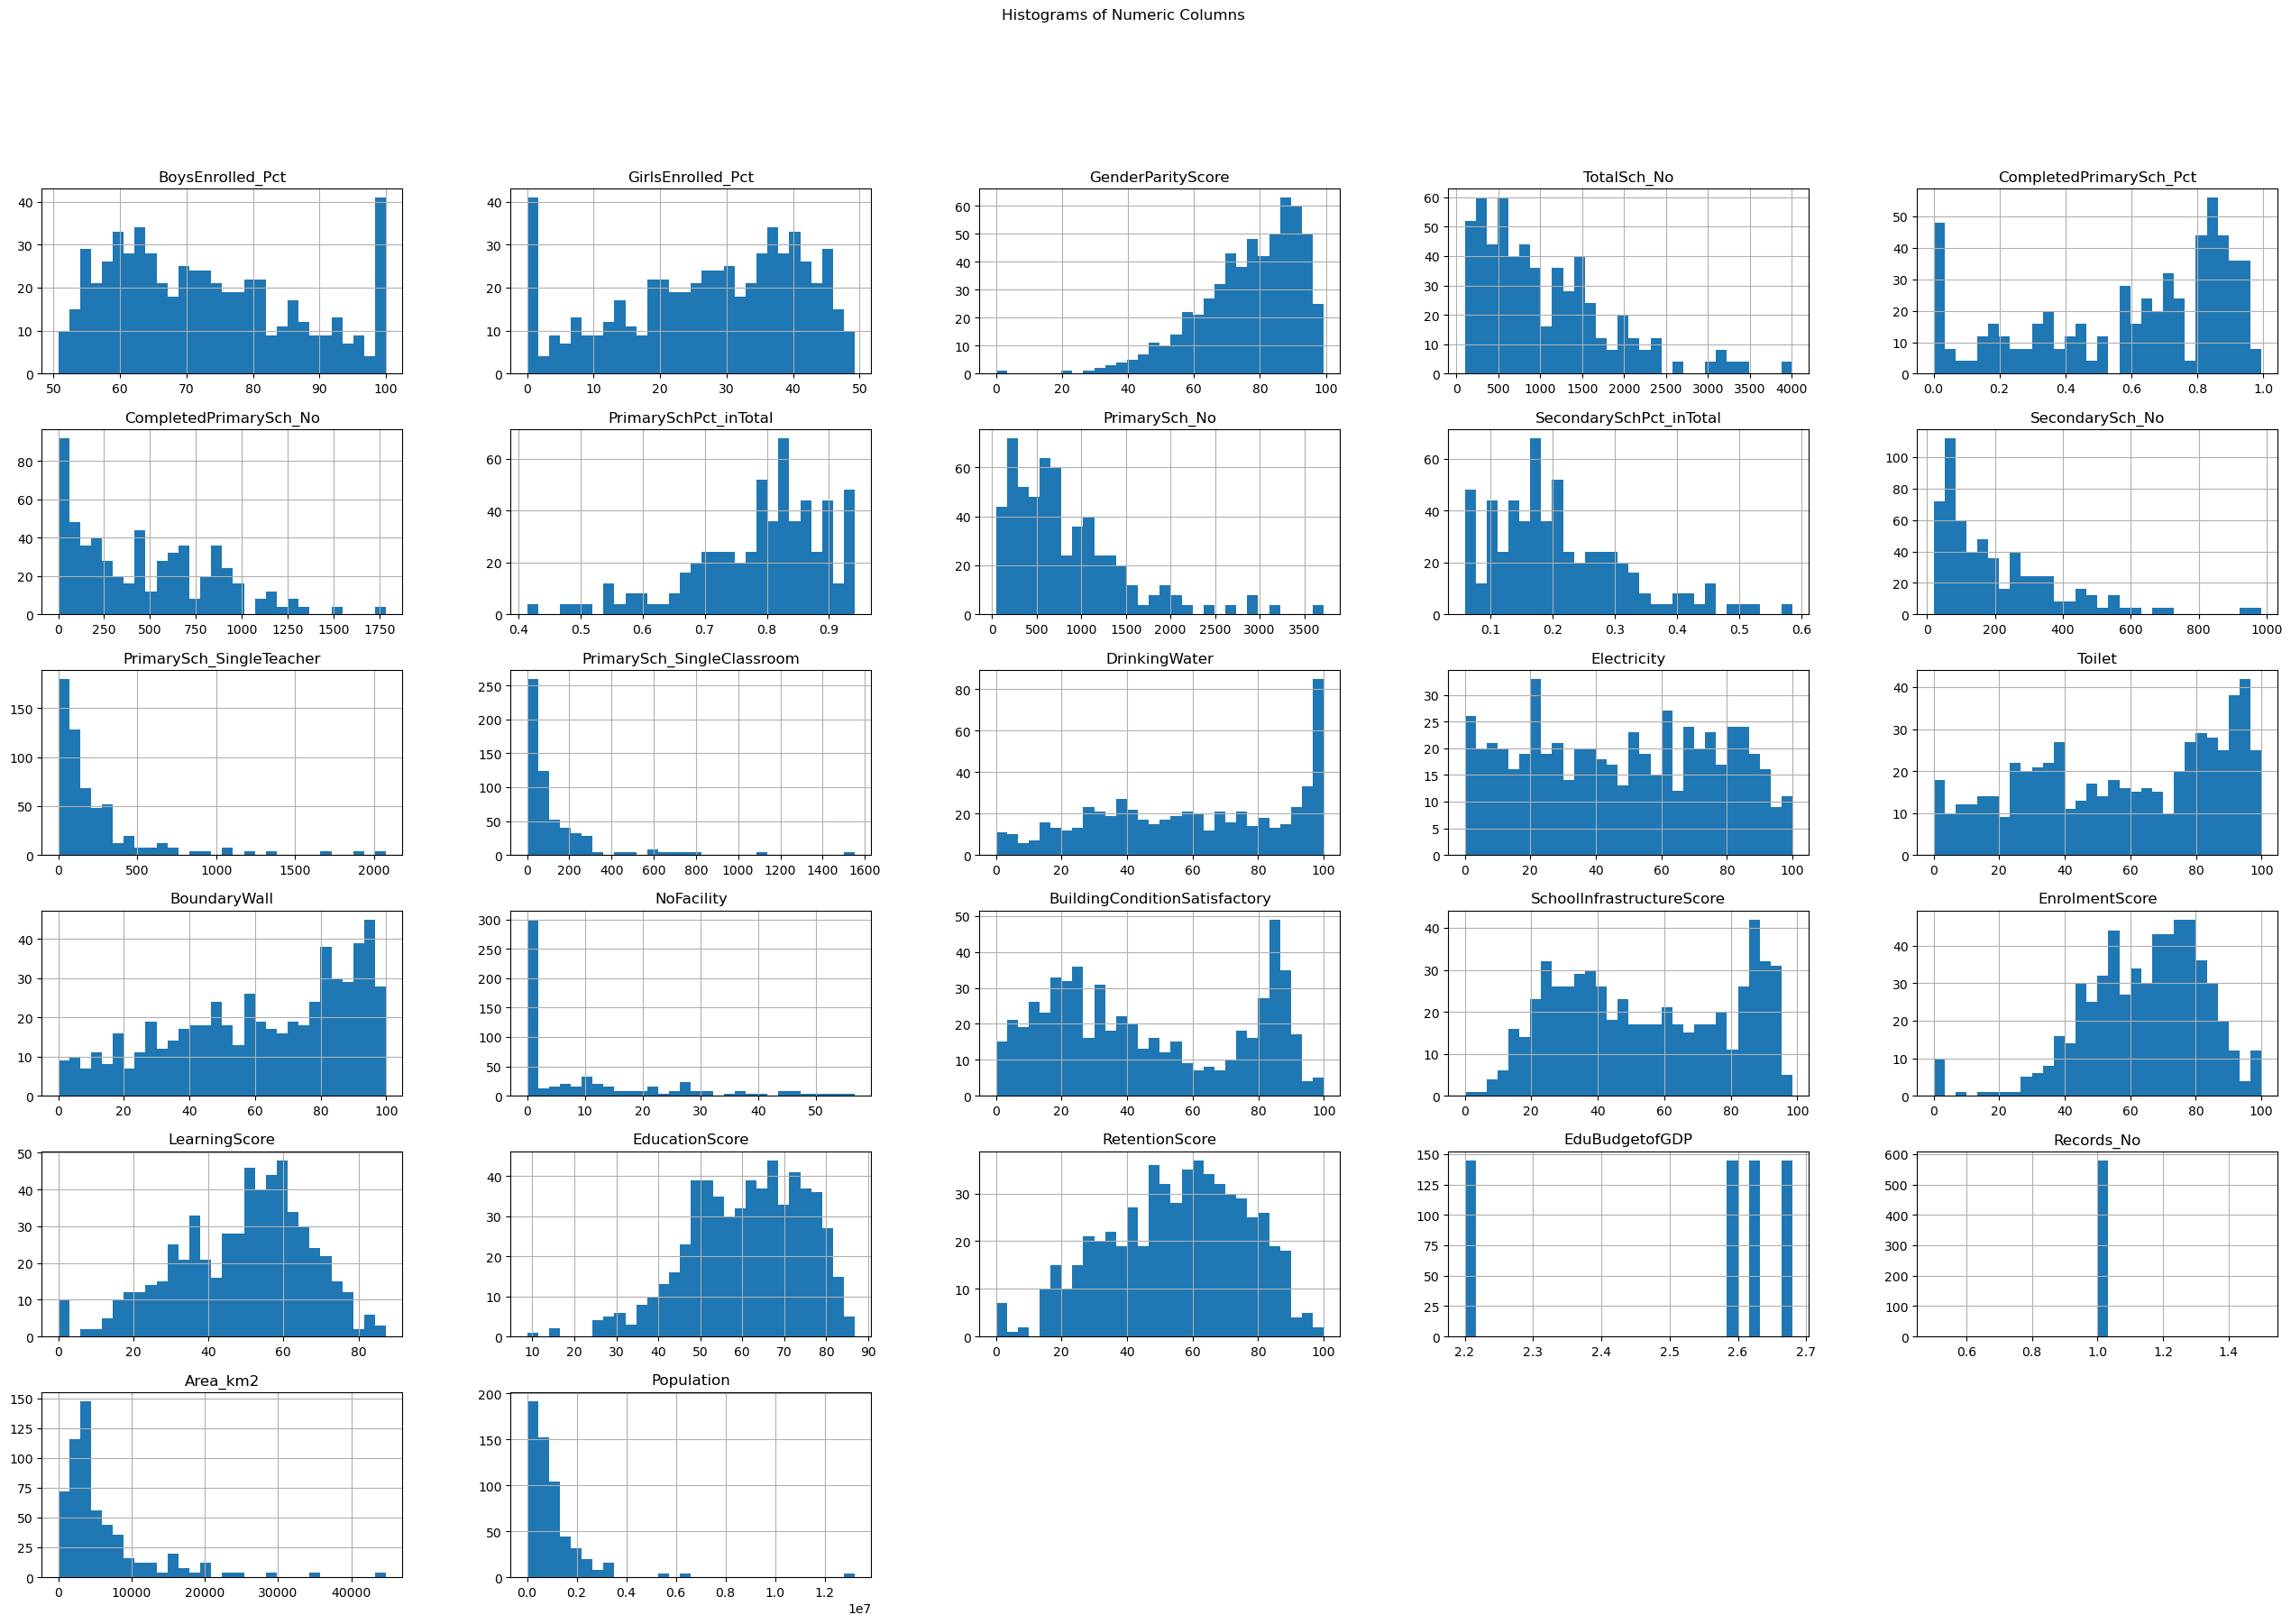

In [37]:
import matplotlib.pyplot as plt

# Plot histograms for all numeric columns
ed_p2.select_dtypes(include=[np.number]).hist(bins=30, figsize=(32, 20))
plt.suptitle("Histograms of Numeric Columns")
plt.show()

#### **Outlier Identification:-**

**Right-Skewed Distributions:**
- `TotalSch_No`
- `CompletedPrimarySch_No`
- `PrimarySch_No`
- `SecondarySch_No`
- `PrimarySch_SingleTeacher`
- `PrimarySch_SingleClassroom`
- `Area_km2`
- `Population`

**Left-Skewed Distributions:**
- `CompletedPrimarySch_Pct`

**Nearly Uniform Distributions:**
- `DrinkingWater`
- `Electricity`
- `Toilet`

**Bimodal / Multi-peaked Distributions:**
- `BuildingConditionSatisfactory`
- `SchoolInfrastructureScore`

**Roughly Normal Distributions:**
- `LearningScore`
- `EducationScore`
- `RetentionScore`

**Potential Outliers (Extreme values or spikes):**
- `NoFacility`
- `BoundaryWall`
- `Records_No`
- `EduBudgettoGDP`

**High-End Clustering / Edge Peaks:**
- `BoysEnrolled_Pct`
- `GirlsEnrolled_Pct`
- `GenderParityScore`

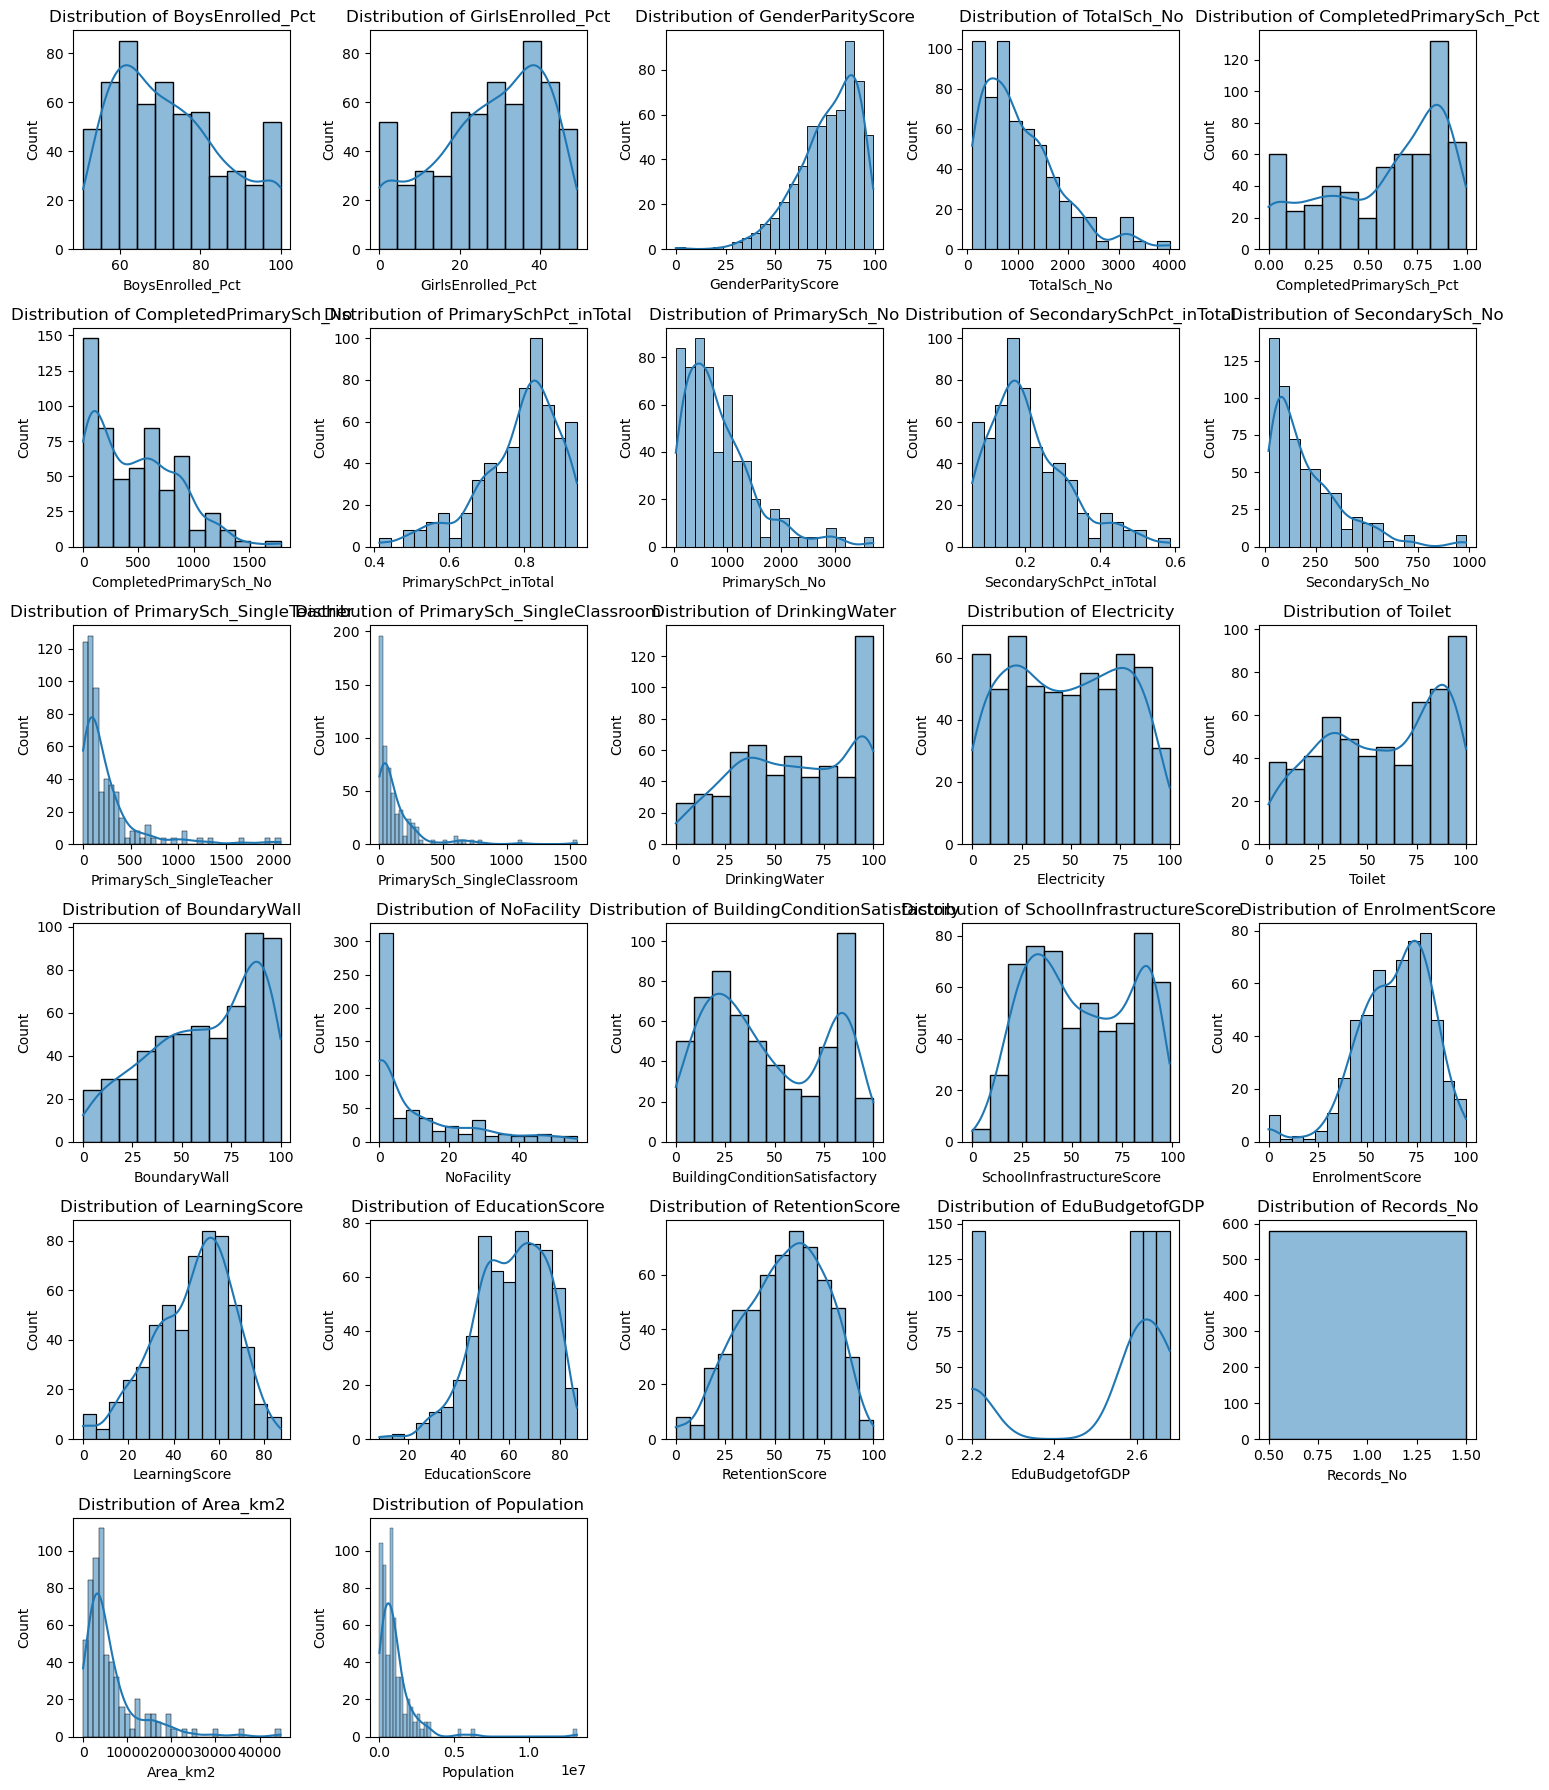

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Number of numeric columns
num_cols = len(ed_p2.select_dtypes(include=[np.number]).columns)

# Calculate rows and columns for the grid
ncols = 5  # you can change this
nrows = int(np.ceil(num_cols / ncols))  # Ceiling to get enough rows

# Create subplots dynamically based on the number of columns
plt.figure(figsize=(ncols * 3, nrows * 3))

# Loop through the numeric columns and create a subplot for each
for i, col in enumerate(ed_p2.select_dtypes(include=[np.number]).columns):
    plt.subplot(nrows, ncols, i + 1)  # Adjust to grid
    sns.histplot(ed_p2[col], kde=True)  # Plot histogram with KDE
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

### **Identify outliers (Z-Score and IQR)**

In [39]:
from scipy.stats import zscore

# Calculate Z-scores for all numeric features
z_scores = zscore(ed_p2.select_dtypes(include=[np.number]))

# Identify outliers (Z-score > 3 or < -3).
# Flags any data point more than 3 standard deviations away from the mean as an outlier.
outliers = np.abs(z_scores) > 3

# Count outliers in each column
outliers_count = np.sum(outliers, axis=0)

# Show outliers count for each column
outliers_count_ed_p2 = pd.DataFrame(outliers_count,
                                    index=ed_p2.select_dtypes(include=[np.number]).columns,
                                    columns=["Outliers Count"])
print(outliers_count_ed_p2)

                               Outliers Count
BoysEnrolled_Pct                            0
GirlsEnrolled_Pct                           0
GenderParityScore                           4
TotalSch_No                                 8
CompletedPrimarySch_Pct                     0
CompletedPrimarySch_No                      4
PrimarySchPct_inTotal                       4
PrimarySch_No                              16
SecondarySchPct_inTotal                     4
SecondarySch_No                             8
PrimarySch_SingleTeacher                   16
PrimarySch_SingleClassroom                 12
DrinkingWater                               0
Electricity                                 0
Toilet                                      0
BoundaryWall                                0
NoFacility                                  4
BuildingConditionSatisfactory               0
SchoolInfrastructureScore                   0
EnrolmentScore                             11
LearningScore                     

#### **Outlier Detection (Z-Score Method):-**

Outliers were identified using the Z-score method. Below is a summary of the number of outliers detected per column:

Columns with notable outliers:
- `PrimarySch_No`: 16
- `PrimarySch_SingleTeacher`: 16
- `PrimarySch_SingleClassroom`: 12
- `Area_km2`: 12
- `Population`: 12
- `TotalSch_No`: 8
- `SecondarySch_No`: 8
- `EnrolmentScore`: 11
- `GenderParityScore`: 4
- `CompletedPrimarySch_No`: 4
- `PrimarySchPct_inTotal`: 4
- `SecondarySchPct_inTotal`: 4
- `NoFacility`: 4
- `EducationScore`: 3
- Others do not have outliers

Outliers are mostly concentrated in school count and infrastructure-related columns, as well as in regional attributes like area and population. These may reflect genuine variation (e.g., large cities or rural areas) but should be reviewed further for potential preprocessing or transformation.

In [40]:
# Calculate IQR for each numeric column
Q1 = ed_p2.select_dtypes(include=[np.number]).quantile(0.25)
Q3 = ed_p2.select_dtypes(include=[np.number]).quantile(0.75)
IQR = Q3 - Q1

# Identify outliers.
# Any value outside the range (Lower bound: Q1 - 1.5 * IQR and Upper bound: Q3 + 1.5 * IQR) is flagged as an outlier.
outliers_iqr = ((ed_p2.select_dtypes(include=[np.number]) < (Q1 - 1.5 * IQR)) | 
                (ed_p2.select_dtypes(include=[np.number]) > (Q3 + 1.5 * IQR)))

# Count outliers in each column
outliers_count_iqr = outliers_iqr.sum()

# Show outliers count for each column
outliers_count_iqr_df = pd.DataFrame(outliers_count_iqr, 
                                     index = ed_p2.select_dtypes(include=[np.number]).columns, 
                                     columns=["Outliers Count"])
print(outliers_count_iqr)

BoysEnrolled_Pct                   0
GirlsEnrolled_Pct                  0
GenderParityScore                 10
TotalSch_No                       24
CompletedPrimarySch_Pct            0
CompletedPrimarySch_No             4
PrimarySchPct_inTotal             16
PrimarySch_No                     24
SecondarySchPct_inTotal           16
SecondarySch_No                   16
PrimarySch_SingleTeacher          56
PrimarySch_SingleClassroom        40
DrinkingWater                      0
Electricity                        0
Toilet                             0
BoundaryWall                       0
NoFacility                        36
BuildingConditionSatisfactory      0
SchoolInfrastructureScore          0
EnrolmentScore                    11
LearningScore                      0
EducationScore                     3
RetentionScore                     0
EduBudgetofGDP                   145
Records_No                         0
Area_km2                          68
Population                        32
d

#### **Outlier Detection (IQR Method):-**

Outliers were detected using the Interquartile Range (IQR) method. The count of outliers in each column is listed below:

Columns with a high number of outliers:
- `EduBudgetofGDP`: 145
- `PrimarySch_SingleTeacher`: 56
- `PrimarySch_SingleClassroom`: 40
- `Area_km2`: 68
- `NoFacility`: 36
- `Population`: 32
- `PrimarySch_No`: 24
- `TotalSch_No`: 24

Columns with moderate outliers:
- `SecondarySch_No`: 16
- `PrimarySchPct_inTotal`: 16
- `SecondarySchPct_inTotal`: 16
- `GenderParityScore`: 10
- `EnrolmentScore`: 11
- `CompletedPrimarySch_No`: 4
- `EducationScore`: 3
- Others do not have outliers

The IQR method revealed more outliers than Z-score, particularly in categorical-looking numerical fields like `EduBudgetofGDP` and regional attributes like `Area_km2` and `Population`. School infrastructure variables also show significant spread, suggesting the presence of extreme cases that may need transformation or separate treatment.

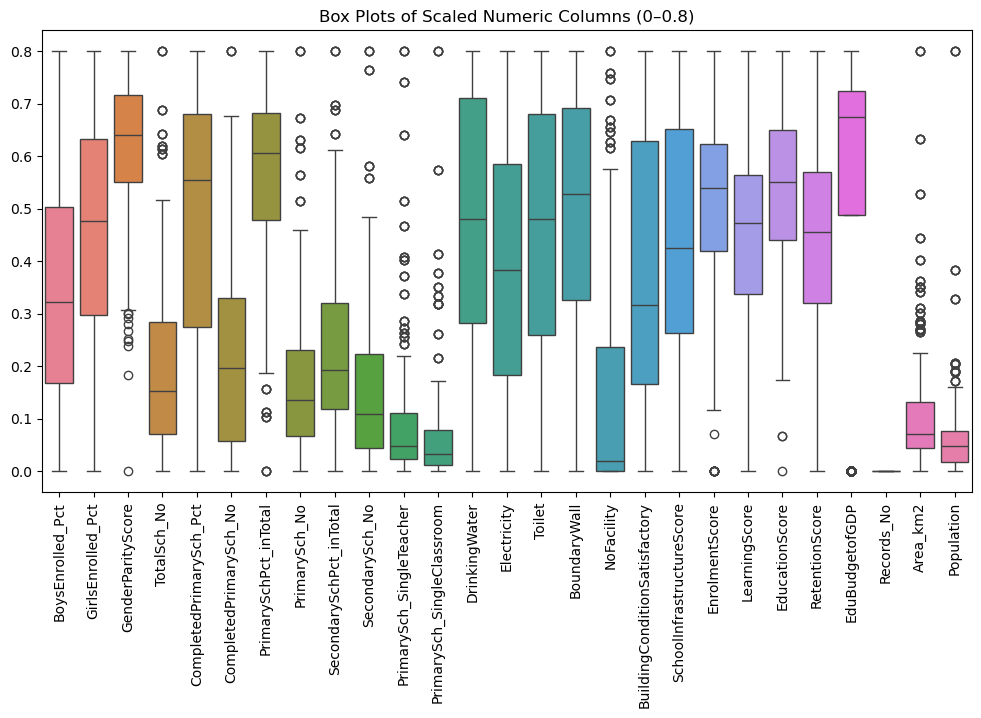

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Select numeric columns
numeric_data = ed_p2.select_dtypes(include=[np.number])

# Scale to 0–0.8 range
scaler = MinMaxScaler(feature_range=(0, 0.8))
scaled_data = pd.DataFrame(scaler.fit_transform(numeric_data), columns=numeric_data.columns)

# Plot boxplots of scaled data
plt.figure(figsize=(12, 6))
sns.boxplot(data=scaled_data)
plt.title("Box Plots of Scaled Numeric Columns (0–0.8)")
plt.xticks(rotation=90)
plt.show()

For better visualization, we have set a range to plot the graph of these numeric values.

### **Normalization**

For modeling, we will use **StandardScaler**-scaled data as it performs best for PCA and regression models.

In [42]:
# Standard Scaling of Numeric Features
from sklearn.preprocessing import StandardScaler

# Automatically identify numeric features, excluding selected columns
numeric_features = ed_p2.select_dtypes(include=['number']).drop(
    columns=['BoundaryWall', 'Area_km2', 'Toilet']
    ).columns.tolist()

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to selected numeric columns
scaled_array = scaler.fit_transform(ed_p2[numeric_features])

# Convert scaled data to a DataFrame with original column names
scaled_data = pd.DataFrame(scaled_array, columns=numeric_features)

# Preview the scaled data
scaled_data.head()

BoysEnrolled_Pct  GirlsEnrolled_Pct  GenderParityScore  TotalSch_No  \
0         -1.296618           1.296510           1.210122    -0.580785   
1         -0.733501           0.733404           0.702398    -0.588565   
2          1.024329          -1.024392          -0.883800    -0.868655   
3         -0.859528           0.859429           0.816299    -1.020371   
4         -0.860985           0.860886           0.817137    -0.016714   

   CompletedPrimarySch_Pct  CompletedPrimarySch_No  PrimarySchPct_inTotal  \
0                 1.140882               -0.382071              -1.957813   
1                 0.005500               -0.589153              -0.862054   
2                 1.149068               -0.547212              -0.488717   
3                 0.778198               -0.819826              -0.554782   
4                -0.000650               -0.057031              -0.530238   

   PrimarySch_No  SecondarySchPct_inTotal  SecondarySch_No  ...  NoFacility  \
0      -0.742795                 1.957813         0.263163  ...    0.468480   
1      -0.642304                 0.862054        -0.142543  ...    1.480352   
2      -0.844785                 0.488717        -0.592710  ...    2.996782   
3      -0.976773                 0.554782        -0.753881  ...    3.200121   
4      -0.126351                 0.530238         0.396545  ...    2.493603   

   BuildingConditionSatisfactory  SchoolInfrastructureScore  EnrolmentScore  \
0                      -0.551812                  -1.162077        0.947422   
1                       0.077072                  -1.007449        0.870572   
2                      -1.104826                  -1.258475        0.784682   
3                      -1.354836                  -1.626630        0.893175   
4                       0.031089                  -1.347597        0.789202   

   LearningScore  EducationScore  RetentionScore  EduBudgetofGDP  Records_No  \
0       1.069441        0.274919       -1.928882        0.357154         0.0   
1       0.335559        0.978566        0.957669        0.357154         0.0   
2      -0.045604       -0.995599       -2.636182        0.357154         0.0   
3      -0.392634       -0.596286       -2.636182        0.357154         0.0   
4      -0.715011        0.607631        0.862088        0.357154         0.0   

   Population  
0   -0.513700  
1   -0.549561  
2   -0.195072  
3   -0.658791  
4   -0.165996  

[5 rows x 24 columns]

#### **Feature Scaling: StandardScaler:-**

To standardize the dataset, `StandardScaler` from `sklearn.preprocessing` was applied to the numeric features (excluding `BoundaryWall`, `Area_km2`, and `Toilet`).

Key Steps:
- Automatically identified all numeric columns except the excluded ones and the target.
- Applied `StandardScaler`, which transforms each feature to have:
  - Mean = 0
  - Standard deviation = 1

Purpose:
This standardization ensures all features contribute equally to distance-based models and helps stabilize numerical performance across different algorithms.

Output:
The scaled values are stored in `scaled_data["StandardScaler"]`, and the result can be used for visualization or model training.

### **Feature Reduction (PCA)**

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Scale data first
numeric_features = ed_p2.select_dtypes(include='number').drop(columns=['EducationScore']).columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(ed_p2[numeric_features])

# Apply PCA
pca = PCA(n_components=5)
pca_components = pca.fit_transform(scaled_data)

# Convert to DataFrame
pca_ed_p2 = pd.DataFrame(pca_components, columns=[f"PCA_{i}" for i in range(1, 6)])
pca_ed_p2.head()

PCA_1     PCA_2     PCA_3     PCA_4     PCA_5
0  0.053765 -2.919131 -3.044494  1.494577  1.024190
1 -0.715909 -1.998010 -2.957450  0.798342 -0.534014
2 -3.156756 -1.815642 -0.799481  3.095527  0.237028
3 -2.729928 -2.375558 -3.286009  2.056527 -0.416324
4 -1.192921 -0.843095 -3.794290  1.625368 -0.508308

#### **Standardized Data:-**

The dataset was standardized using `StandardScaler`, which transforms each feature to have a mean of 0 and standard deviation of 1.

- Most values are centered around 0, confirming successful standardization.
- Some features exhibit strong deviation from the mean (e.g., `NoFacility`, `SchoolInfrastructureScore`, `RetentionScore`), indicating potential influence on the PCA components.
- Standardization ensures that features measured on different scales (e.g., enrollment %, population counts) contribute equally to PCA.

This transformed dataset is now well-prepared for dimensionality reduction and further modeling.


### **Feature Selection** 

Using f_regression instead of f_classif since our data is regressive.

In [44]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_regression

# Encode categorical columns
X = ed_p2.drop(columns=['EducationScore']).copy()
y = ed_p2['EducationScore']

for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col])

# Feature selection
selector = SelectKBest(score_func=f_regression, k=10)
X_new = selector.fit_transform(X, y)

# Get selected features
selected_features = selector.get_support(indices=True)
selected_ed_p2 = X.iloc[:, selected_features]
selected_ed_p2.head()

BoysEnrolled_Pct  GirlsEnrolled_Pct  GenderParityScore  \
0             54.77              45.23          95.226372   
1             62.50              37.50          87.501106   
2             86.63              13.37          63.366337   
3             60.77              39.23          89.234168   
4             60.75              39.25          89.246914   

   PrimarySchPct_inTotal  SecondarySchPct_inTotal     Toilet  \
0               0.577371                 0.422629  37.393768   
1               0.695798                 0.304202  20.728929   
2               0.736148                 0.263852  43.840580   
3               0.729008                 0.270992  26.203209   
4               0.731660                 0.268340  14.888011   

   SchoolInfrastructureScore  EnrolmentScore  LearningScore  RetentionScore  
0                  24.929178       81.750000      67.800000            14.8  
1                  28.883827       80.333333      54.900000            75.2  
2                  22.463768       78.750000      48.200000             0.0  
3                  13.048128       80.750000      42.100000             0.0  
4                  20.184453       78.833333      36.433333            73.2

#### **Most important features:-**

The top ten important features besides the target feature are as follows:
- `BoysEnrolled_Pct`
- `GirlsEnrolled_Pct`
- `GenderParityScore`
- `PrimarySchPct_inTotal`
- `SecondarySchPct_inTotal`
- `Toilet`
- `SchoolInfrasructureScore`
- `EnrolmentScore`
- `LearningScore`
- `RetenttionScore`

### **Class balance and Resampling**

Although our main target variable `EducationScore` is continuous (used in regression), we also performed classification tasks on certain class-based features like Education class, which categorize schools as `High`, `Medium`, or `Low` performing.

These classes were imbalanced — for example, fewer `High` level schools compared to `Medium` — so we applied:

- **Oversampling** (e.g., SMOTE or RandomOverSampler) to increase instances of minority classes
- **Undersampling** to reduce instances of overrepresented classes

This helped in:
- Improving the balance in classification datasets
- Avoiding bias toward majority classes
- Ensuring more reliable training for models like decision trees or logistic regression

Note: These sampling techniques were only applied to classification tasks, not regression (i.e., not on `EducationScore`).

Class Distribution:
 EducationScore
67.110000    2
51.990000    2
72.480000    2
61.490000    2
77.050000    2
            ..
41.745000    1
38.410000    1
38.835000    1
64.120000    1
52.153092    1
Name: count, Length: 573, dtype: int64


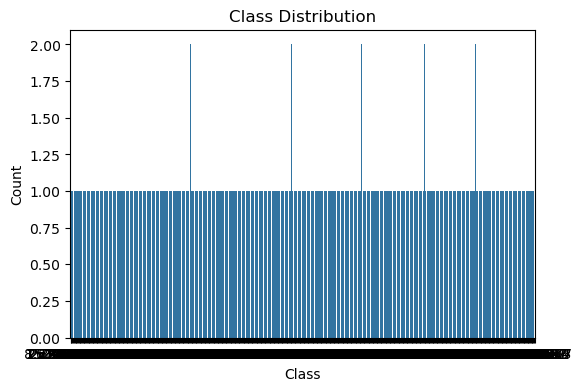

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Count the class distribution
class_counts = ed_p2["EducationScore"].value_counts()

# Print the counts
print("Class Distribution:\n", class_counts)

# Visualize
plt.figure(figsize=(6, 4))
sns.countplot(data=ed_p2, x="EducationScore")
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

Class Distribution in Education Data:
 EduClass
Medium    286
High      171
Low       123
Name: count, dtype: int64


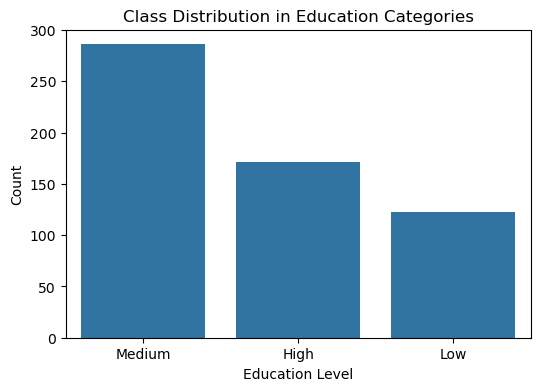

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a categorical class from EducationScore
def categorize_score(score):
    if score < 50:
        return 'Low'
    elif 50 <= score < 70:
        return 'Medium'
    else:
        return 'High'

# Apply the function
ed_p2["EduClass"] = ed_p2["EducationScore"].apply(categorize_score)

# View value counts
class_counts = ed_p2["EduClass"].value_counts()
print("Class Distribution in Education Data:\n", class_counts)

# Visualize
plt.figure(figsize=(6, 4))
sns.countplot(data=ed_p2, x="EduClass")
plt.title("Class Distribution in Education Categories")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.show()

#### **Class  distribution:-**
Medium leads with count 286, followed by High with 171 count and Low at the lowest with 123. 

### **Over-sampling**

In [47]:
from sklearn.utils import resample
from collections import Counter
from sklearn.model_selection import train_test_split

# Define features and target
X = ed_p2.drop(columns="EduClass")   # Drop target column
y = ed_p2["EduClass"]                # Target column

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Separate classes
X_low = X_train[y_train == "Low"]
X_medium = X_train[y_train == "Medium"]
X_high = X_train[y_train == "High"]

y_low = y_train[y_train == "Low"]
y_medium = y_train[y_train == "Medium"]
y_high = y_train[y_train == "High"]

# Find the majority class count
max_count = max(len(y_low), len(y_medium), len(y_high))

# Oversample all to match majority
X_low_resampled, y_low_resampled = resample(X_low, y_low, replace=True, n_samples=max_count, random_state=42)
X_medium_resampled, y_medium_resampled = resample(X_medium, y_medium, replace=True, n_samples=max_count, random_state=42)
X_high_resampled, y_high_resampled = resample(X_high, y_high, replace=True, n_samples=max_count, random_state=42)

# Combine all into one training set
X_train_balanced = pd.concat([X_low_resampled, X_medium_resampled, X_high_resampled])
y_train_balanced = pd.concat([y_low_resampled, y_medium_resampled, y_high_resampled])

# Print class distribution
print("Original distribution:", Counter(y_train))
print("Balanced distribution:", Counter(y_train_balanced))

Original distribution: Counter({'Medium': 215, 'High': 128, 'Low': 92})
Balanced distribution: Counter({'Low': 215, 'Medium': 215, 'High': 215})


### **Under-sampling**

In [48]:
from sklearn.utils import resample
from collections import Counter
from sklearn.model_selection import train_test_split

# Define features and target
X = ed_p2.drop(columns="EduClass")  # Features
y = ed_p2["EduClass"]               # Target class

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Separate each class
X_low = X_train[y_train == "Low"]
X_medium = X_train[y_train == "Medium"]
X_high = X_train[y_train == "High"]

y_low = y_train[y_train == "Low"]
y_medium = y_train[y_train == "Medium"]
y_high = y_train[y_train == "High"]

# Find the minimum class count
min_count = min(len(y_low), len(y_medium), len(y_high))

# Undersample each class to match the smallest class
X_low_sampled, y_low_sampled = resample(X_low, y_low, replace=False, n_samples=min_count, random_state=42)
X_medium_sampled, y_medium_sampled = resample(X_medium, y_medium, replace=False, n_samples=min_count, random_state=42)
X_high_sampled, y_high_sampled = resample(X_high, y_high, replace=False, n_samples=min_count, random_state=42)

# Combine all classes to make balanced dataset
X_train_balanced = pd.concat([X_low_sampled, X_medium_sampled, X_high_sampled])
y_train_balanced = pd.concat([y_low_sampled, y_medium_sampled, y_high_sampled])

# Check class distribution
print("Original class distribution:", Counter(y_train))
print("Undersampled class distribution:", Counter(y_train_balanced))

Original class distribution: Counter({'Medium': 215, 'High': 128, 'Low': 92})
Undersampled class distribution: Counter({'Low': 92, 'Medium': 92, 'High': 92})


#### **Handling Class Imbalance: Oversampling vs. Undersampling**

**Original Class Distribution:-**
- **Medium**: 215  
- **High**: 128  
- **Low**: 92

The dataset was initially imbalanced, which can lead to biased predictions toward the majority class.

**After Oversampling:-**
Oversampling duplicates or synthetically generates more samples for the minority classes (`Low`, `High`) until all classes have the same number of samples as the majority (`Medium`)
- **Low**: 215  
- **Medium**: 215  
- **High**: 215

**After Undersampling:-**
Undersampling reduces the majority classes (`Medium`, `High`) to match the size of the minority class (`Low`), resulting in a smaller but balanced dataset.
- **Low**: 92
- **Medium**: 92  
- **High**: 92

Note: Oversampling is preferable when data quantity is important and overfitting is manageable whereas undersampling is useful when quick training or computational efficiency is needed, but may degrade model accuracy. Choice depends on dataset size, model type, and performance needs.

## **LAB # 10: FEATURE ENGINEERING (Phase # 03)**

In [49]:
# ---- Phase 3: Feature Engineering ----
import pandas as pd
import numpy as np

# working on a copy of 'ed_p2' because it handled missing values, treated outliers, normalization and PCA etc. 
ed_p3 = ed_p2.copy()  

In [50]:
ed_p3.head()

BoysEnrolled_Pct  GirlsEnrolled_Pct  GenderParityScore  TotalSch_No  \
0             54.77              45.23          95.226372          601   
1             62.50              37.50          87.501106          595   
2             86.63              13.37          63.366337          379   
3             60.77              39.23          89.234168          262   
4             60.75              39.25          89.246914         1036   

   CompletedPrimarySch_Pct  CompletedPrimarySch_No  PrimarySchPct_inTotal  \
0                 0.936599                   325.0               0.577371   
1                 0.594203                   246.0               0.695798   
2                 0.939068                   262.0               0.736148   
3                 0.827225                   158.0               0.729008   
4                 0.592348                   449.0               0.731660   

   PrimarySch_No  SecondarySchPct_inTotal  SecondarySch_No  ...  \
0            347                 0.422629              254  ...   
1            414                 0.304202              181  ...   
2            279                 0.263852              100  ...   
3            191                 0.270992               71  ...   
4            758                 0.268340              278  ...   

   LearningScore  EducationScore  RetentionScore  EduBudgetofGDP  Records_No  \
0      67.800000       64.894093            14.8            2.59           1   
1      54.900000       74.483610            75.2            2.59           1   
2      48.200000       47.579084             0.0            2.59           1   
3      42.100000       53.021042             0.0            2.59           1   
4      36.433333       69.428395            73.2            2.59           1   

   Area_km2  Population     City  Province  EduClass  
0     768.0    351415.0     Bagh       AJK    Medium  
1    1516.0    301633.0  Bhimber       AJK      High  
2    3948.0    793731.0  Hattian       AJK       Low  
3     600.0    150000.0   Haveli       AJK    Medium  
4    2162.0    834094.0    Kotli       AJK    Medium  

[5 rows x 30 columns]

In [51]:
pip install WordCloud

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



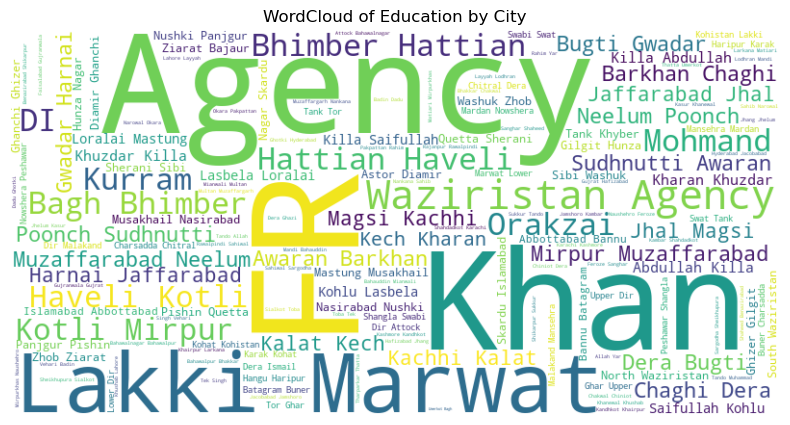

In [52]:
from wordcloud import WordCloud

text = ' '.join(ed_p3['City'].dropna().astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Education by City")
plt.show()

### **Creating new features**

In [53]:
# Create a combined region feature
ed_p3['Region'] = ed_p3['City'] + ', ' + ed_p3['Province']

In [54]:
# Create a student school ratio
ed_p3['Student_School_Ratio'] = (ed_p3['BoysEnrolled_Pct'] + ed_p3['GirlsEnrolled_Pct']) / ed_p3['TotalSch_No']

In [55]:
# Create a primary vs secondary school ratio
ed_p3['Primary_Secondary_Ratio'] = ed_p3['PrimarySch_No'] / (ed_p3['SecondarySch_No'] + 1)

In [56]:
# Create a new feeature to see mean education score per province and city
ed_p3['Province_EduScore_Avg'] = ed_p3.groupby('Province')['EducationScore'].transform('mean')
ed_p3['City_EduScore_Avg'] = ed_p3.groupby('City')['EducationScore'].transform('mean')

In [57]:
# View new features
ed_p3.head()

BoysEnrolled_Pct  GirlsEnrolled_Pct  GenderParityScore  TotalSch_No  \
0             54.77              45.23          95.226372          601   
1             62.50              37.50          87.501106          595   
2             86.63              13.37          63.366337          379   
3             60.77              39.23          89.234168          262   
4             60.75              39.25          89.246914         1036   

   CompletedPrimarySch_Pct  CompletedPrimarySch_No  PrimarySchPct_inTotal  \
0                 0.936599                   325.0               0.577371   
1                 0.594203                   246.0               0.695798   
2                 0.939068                   262.0               0.736148   
3                 0.827225                   158.0               0.729008   
4                 0.592348                   449.0               0.731660   

   PrimarySch_No  SecondarySchPct_inTotal  SecondarySch_No  ...  Area_km2  \
0            347                 0.422629              254  ...     768.0   
1            414                 0.304202              181  ...    1516.0   
2            279                 0.263852              100  ...    3948.0   
3            191                 0.270992               71  ...     600.0   
4            758                 0.268340              278  ...    2162.0   

   Population     City  Province  EduClass        Region  \
0    351415.0     Bagh       AJK    Medium     Bagh, AJK   
1    301633.0  Bhimber       AJK      High  Bhimber, AJK   
2    793731.0  Hattian       AJK       Low  Hattian, AJK   
3    150000.0   Haveli       AJK    Medium   Haveli, AJK   
4    834094.0    Kotli       AJK    Medium    Kotli, AJK   

   Student_School_Ratio  Primary_Secondary_Ratio  Province_EduScore_Avg  \
0              0.166389                 1.360784              74.001801   
1              0.168067                 2.274725              74.001801   
2              0.263852                 2.762376              74.001801   
3              0.381679                 2.652778              74.001801   
4              0.096525                 2.716846              74.001801   

   City_EduScore_Avg  
0          75.819906  
1          77.274156  
2          71.242819  
3          72.668896  
4          77.593636  

[5 rows x 35 columns]

#### **List of new features:-**
Five new features have been created as shown above in the table. These features are: 
- `Region`: Combines city and province as Karachi, Sindh etc
- `Student_School_Ratio`: Ratio of both girls and boys students to school
- `Primary_Secondary_Ratio`: Ratio of primary to secondary schools
- `Province_EduScore_Avg`: Mean education score per province
- `City_EduScore_Avg`: Mean education score per city

### **Label Encoding**

In [58]:
# Province_Code and City_Code: Label-encoded versions for models that work better with numeric input.
from sklearn.preprocessing import LabelEncoder

province_encoder = LabelEncoder()
ed_p3['Province_Code'] = province_encoder.fit_transform(ed_p3['Province'])

city_encoder = LabelEncoder()
ed_p3['City_Code'] = city_encoder.fit_transform(ed_p3['City'])

In [59]:
# View new features
ed_p3.head()

BoysEnrolled_Pct  GirlsEnrolled_Pct  GenderParityScore  TotalSch_No  \
0             54.77              45.23          95.226372          601   
1             62.50              37.50          87.501106          595   
2             86.63              13.37          63.366337          379   
3             60.77              39.23          89.234168          262   
4             60.75              39.25          89.246914         1036   

   CompletedPrimarySch_Pct  CompletedPrimarySch_No  PrimarySchPct_inTotal  \
0                 0.936599                   325.0               0.577371   
1                 0.594203                   246.0               0.695798   
2                 0.939068                   262.0               0.736148   
3                 0.827225                   158.0               0.729008   
4                 0.592348                   449.0               0.731660   

   PrimarySch_No  SecondarySchPct_inTotal  SecondarySch_No  ...     City  \
0            347                 0.422629              254  ...     Bagh   
1            414                 0.304202              181  ...  Bhimber   
2            279                 0.263852              100  ...  Hattian   
3            191                 0.270992               71  ...   Haveli   
4            758                 0.268340              278  ...    Kotli   

   Province  EduClass        Region  Student_School_Ratio  \
0       AJK    Medium     Bagh, AJK              0.166389   
1       AJK      High  Bhimber, AJK              0.168067   
2       AJK       Low  Hattian, AJK              0.263852   
3       AJK    Medium   Haveli, AJK              0.381679   
4       AJK    Medium    Kotli, AJK              0.096525   

   Primary_Secondary_Ratio  Province_EduScore_Avg  City_EduScore_Avg  \
0                 1.360784              74.001801          75.819906   
1                 2.274725              74.001801          77.274156   
2                 2.762376              74.001801          71.242819   
3                 2.652778              74.001801          72.668896   
4                 2.716846              74.001801          77.593636   

   Province_Code  City_Code  
0              0          5  
1              0         13  
2              0         43  
3              0         44  
4              0         73  

[5 rows x 37 columns]

#### **Label Encoding:-**
Label encoding assigns a unique integer to each category in a column. This is useful for models that require purely numeric input.
- This was applied to prepare the `Province` and `City` columns for machine learning models.
- Each city and province is replaced with a corresponding numeric code.
- Encoded values are arbitrary and do not reflect frequency or order.

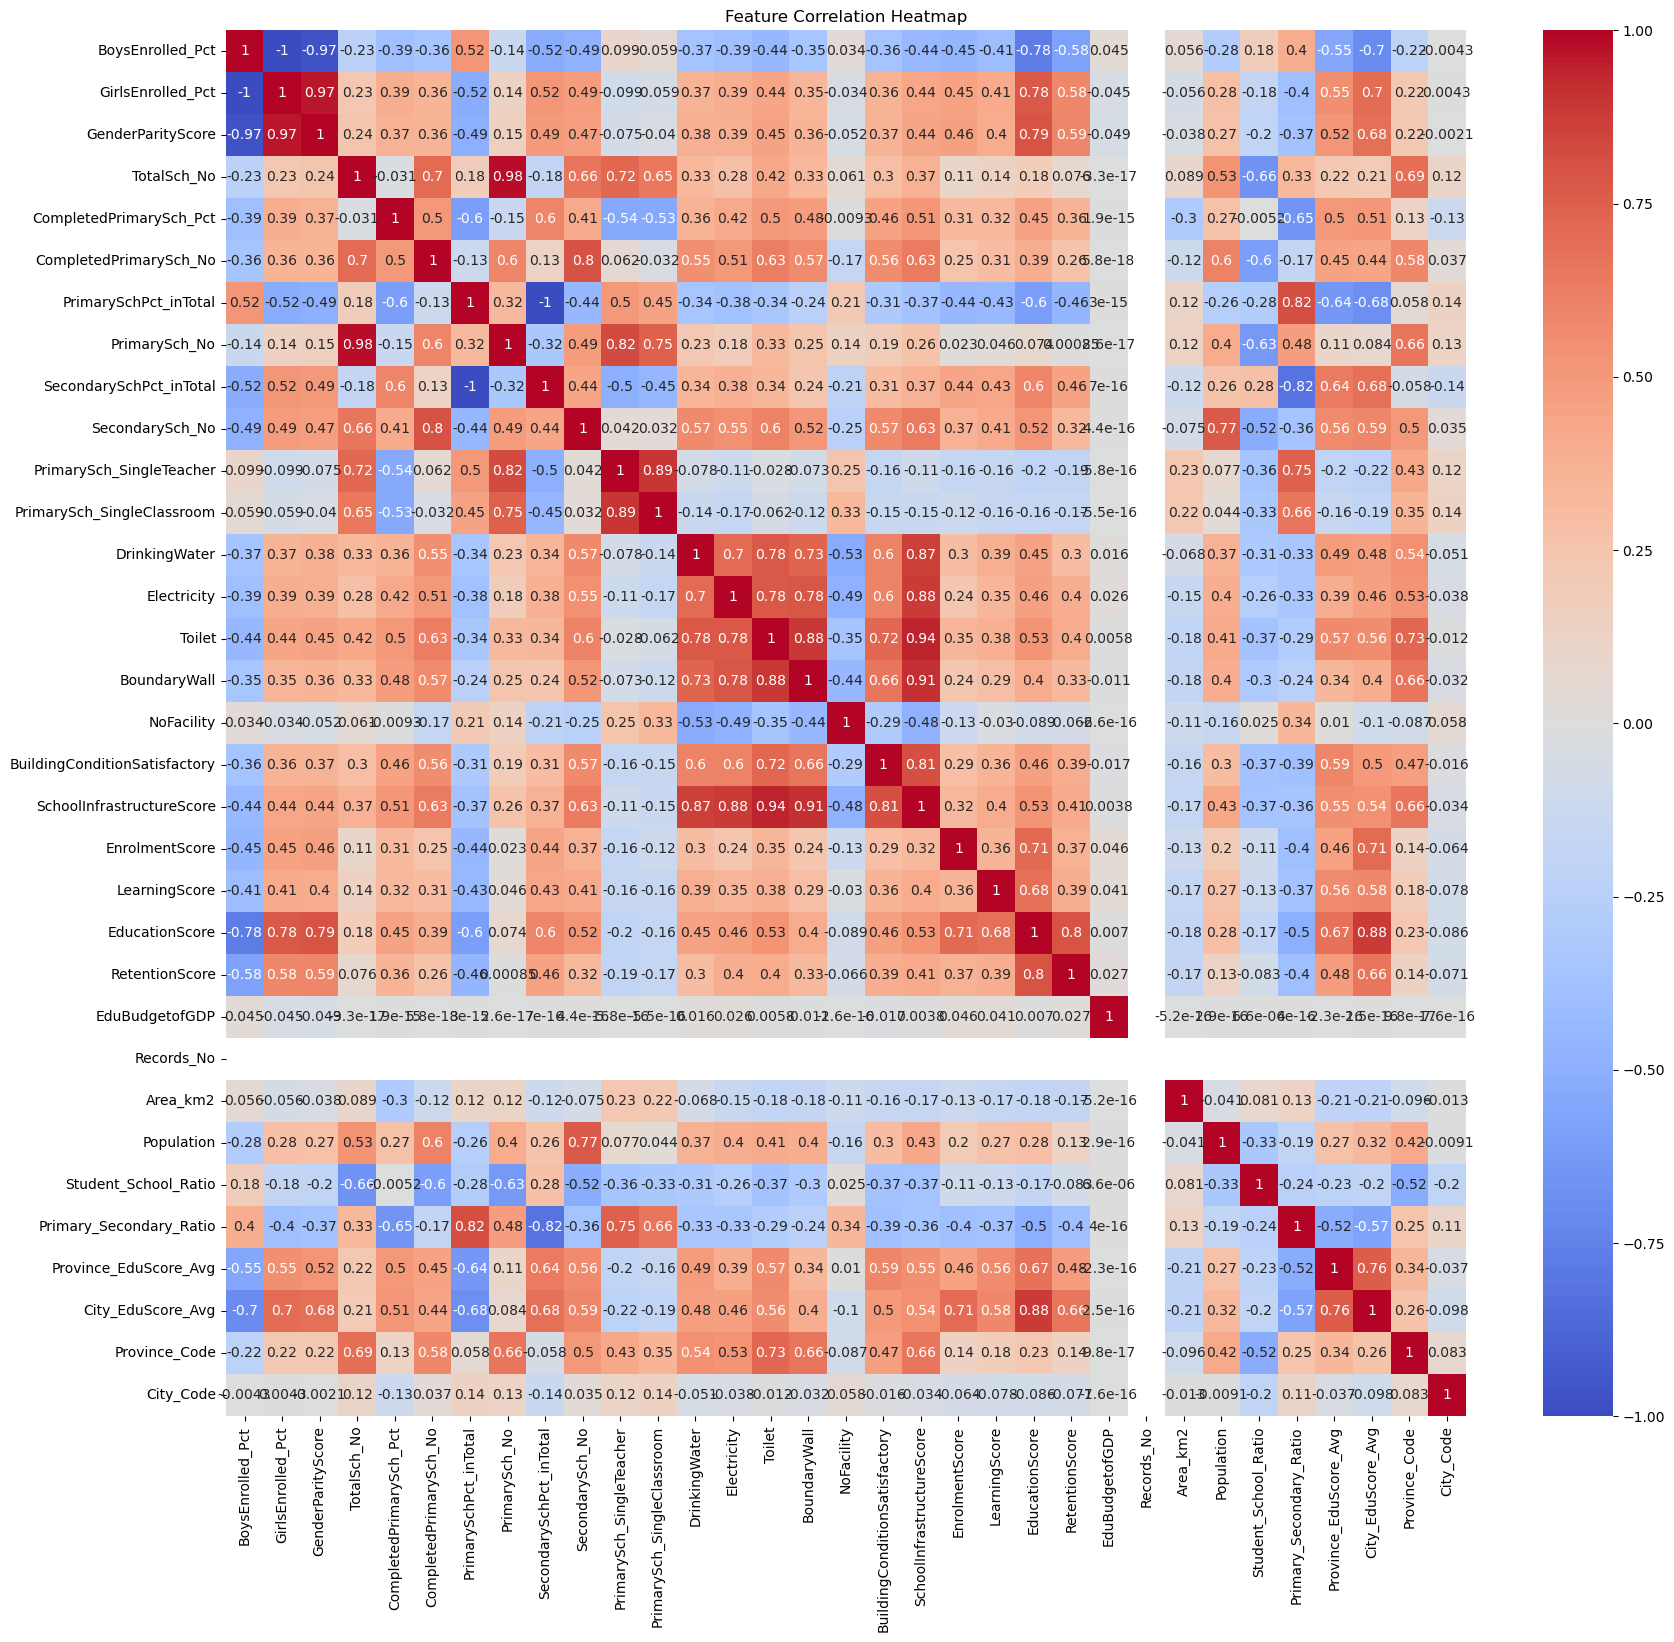

In [60]:
# Heapmap
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = ed_p3.corr(numeric_only=True)
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

### **Frequency Encoding**

In [61]:
# Frequency encoding for 'City' and 'Province'
ed_p3['City_encoded'] = ed_p3['City'].map(ed_p3['City'].value_counts())
ed_p3['Province_encoded'] = ed_p3['Province'].map(ed_p3['Province'].value_counts())

# Optional: View the updated DataFrame
ed_p3[['City', 'City_encoded', 'Province', 'Province_encoded']].head()

City  City_encoded Province  Province_encoded
0     Bagh             4      AJK                40
1  Bhimber             4      AJK                40
2  Hattian             4      AJK                40
3   Haveli             4      AJK                40
4    Kotli             4      AJK                40

#### **Frequency Encoding:-**
Frequency encoding ses the frequency of category appearance. This is useful for Tree-based or ensemble models.
- This was applied to prepare the `Province` and `City` columns for machine learning models.
- Categories that appear more frequently get higher values.

### **Creating a custom feature**

#### **UtilityScore Feature:-**

To quantify the potential impact of resource allocation, we created a new feature called `UtilityScore`.

This score is calculated using a weighted combination of:
- `RetentionScore`
- `LearningScore`
- `GenderParityScore`
- `SchoolInfrastructureScore`
- `EnrolmentScore`
- `Student_School_Ratio`

The `UtilityScore` helps identify districts where investments would yield the highest improvement in education outcomes. It is treated as an engineered feature for downstream modeling and simulation. This will be used later in Modelling phase to sorts districts by utility, simulate future improvement etc.

In [62]:
def compute_utility(row, weights=None):
    if weights is None:
        weights = {
            "RetentionScore": 0.2,
            "LearningScore": 0.2,
            "GenderParityScore": 0.1,
            "SchoolInfrastructureScore": 0.2,
            "EnrolmentScore": 0.15,
            "Student_School_Ratio": 0.15
        }
    
    # Normalize inverse ratios if needed
    ratio_score = 1 / (row["Student_School_Ratio"] + 1)  # avoid divide by zero

    utility = (
        weights["RetentionScore"] * row["RetentionScore"] +
        weights["LearningScore"] * row["LearningScore"] +
        weights["GenderParityScore"] * row["GenderParityScore"] +
        weights["SchoolInfrastructureScore"] * row["SchoolInfrastructureScore"] +
        weights["EnrolmentScore"] * row["EnrolmentScore"] +
        weights["Student_School_Ratio"] * ratio_score
    )

    return utility

In [63]:
# Apply this new feauture to dataset
ed_p3["UtilityScore"] = ed_p3.apply(compute_utility, axis=1)
ed_p3.head()

BoysEnrolled_Pct  GirlsEnrolled_Pct  GenderParityScore  TotalSch_No  \
0             54.77              45.23          95.226372          601   
1             62.50              37.50          87.501106          595   
2             86.63              13.37          63.366337          379   
3             60.77              39.23          89.234168          262   
4             60.75              39.25          89.246914         1036   

   CompletedPrimarySch_Pct  CompletedPrimarySch_No  PrimarySchPct_inTotal  \
0                 0.936599                   325.0               0.577371   
1                 0.594203                   246.0               0.695798   
2                 0.939068                   262.0               0.736148   
3                 0.827225                   158.0               0.729008   
4                 0.592348                   449.0               0.731660   

   PrimarySch_No  SecondarySchPct_inTotal  SecondarySch_No  ...        Region  \
0            347                 0.422629              254  ...     Bagh, AJK   
1            414                 0.304202              181  ...  Bhimber, AJK   
2            279                 0.263852              100  ...  Hattian, AJK   
3            191                 0.270992               71  ...   Haveli, AJK   
4            758                 0.268340              278  ...    Kotli, AJK   

   Student_School_Ratio  Primary_Secondary_Ratio  Province_EduScore_Avg  \
0              0.166389                 1.360784              74.001801   
1              0.168067                 2.274725              74.001801   
2              0.263852                 2.762376              74.001801   
3              0.381679                 2.652778              74.001801   
4              0.096525                 2.716846              74.001801   

   City_EduScore_Avg  Province_Code  City_Code  City_encoded  \
0          75.819906              0          5             4   
1          77.274156              0         13             4   
2          71.242819              0         43             4   
3          72.668896              0         44             4   
4          77.593636              0         73             4   

   Province_encoded  UtilityScore  
0                40     43.419575  
1                40     52.725293  
2                40     32.400572  
3                40     32.174106  
4                40     46.850044  

[5 rows x 40 columns]

## **LAB # 11: MODEL SELECTION AND EVALUATION (Phase # 04)** 

(Using ed_p3 instead of creating a copy as it is ready for model implementation)

### **Train-Test Split**

In [64]:
from sklearn.model_selection import train_test_split
# Separate features and target
X = ed_p3.drop(columns=['EducationScore'])
y = ed_p3['EducationScore']

# Split data for better practice (e.g., train/test split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the resulting sets
print(f"Training data size: {X_train.shape[0]} rows")
print(f"Test data size: {X_test.shape[0]} rows")

Training data size: 464 rows
Test data size: 116 rows


#### **Train-Test Split Summary:-**

- **Training Data Size:** 464 rows  
- **Test Data Size:** 116 rows

The dataset was split to evaluate the model’s generalization ability.  
Approximately **80%** of the data was used for training, and **20%** for testing.  
This ensures the model is evaluated on unseen data to detect overfitting or underfitting.

In [65]:
print(X_train.dtypes)

BoysEnrolled_Pct                 float64
GirlsEnrolled_Pct                float64
GenderParityScore                float64
TotalSch_No                        int64
CompletedPrimarySch_Pct          float64
CompletedPrimarySch_No           float64
PrimarySchPct_inTotal            float64
PrimarySch_No                      int64
SecondarySchPct_inTotal          float64
SecondarySch_No                    int64
PrimarySch_SingleTeacher         float64
PrimarySch_SingleClassroom       float64
DrinkingWater                    float64
Electricity                      float64
Toilet                           float64
BoundaryWall                     float64
NoFacility                       float64
BuildingConditionSatisfactory    float64
SchoolInfrastructureScore        float64
EnrolmentScore                   float64
LearningScore                    float64
RetentionScore                   float64
EduBudgetofGDP                   float64
Records_No                         int64
Area_km2        

In [66]:
# String to float conversion to reduce complexity later
def percent_to_float(x):
    if isinstance(x, str) and x.endswith('%'):
        return float(x.strip('%')) / 100
    return x

for col in X_train.columns:
    if X_train[col].dtype == object:
        X_train[col] = X_train[col].apply(percent_to_float)
        X_test[col] = X_test[col].apply(percent_to_float)

#### **Data types summary:-**
Some features such as `City`, `Province`, `EduClass` and `Region` were **object** so string to float conversion has been done to handle them.

In [67]:
# Encoding features with string values
from sklearn.preprocessing import LabelEncoder
import joblib

# City: Assuming 'ed_p3' has the original 'City' column
city_encoder = LabelEncoder()
ed_p3['City_Code'] = city_encoder.fit_transform(ed_p3['City'])
joblib.dump(city_encoder, 'le_city.pkl')

# Province
le_province = LabelEncoder()
X_train['Province_encoded'] = le_province.fit_transform(X_train['Province'])
X_test['Province_encoded'] = le_province.transform(X_test['Province'])
joblib.dump(le_province, 'le_province.pkl')

# EduClass
le_educlass = LabelEncoder()
X_train['EduClass_encoded'] = le_educlass.fit_transform(X_train['EduClass'])
X_test['EduClass_encoded'] = le_educlass.transform(X_test['EduClass'])
joblib.dump(le_educlass, 'le_educlass.pkl')

# Region
le_region = LabelEncoder()
X_train['Region_encoded'] = le_region.fit_transform(X_train['Region'])
X_test['Region_encoded'] = le_region.transform(X_test['Region'])
joblib.dump(le_region, 'le_region.pkl')

['le_region.pkl']

Encoded features like `City`, `Province`, `EduClass` and `Region` and saved encoded version to **.pkl** files.

In [68]:
# Dropping original text columns after encoding
columns_to_drop = ['City', 'Province', 'EduClass', 'Region']
X_train = X_train.drop(columns=[col for col in columns_to_drop if col in X_train.columns])
X_test = X_test.drop(columns=[col for col in columns_to_drop if col in X_test.columns])

In [69]:
# Double-checking to make sure if any column still needs encoding or dropping
print(X_train.dtypes) 
print(X_train.head())

BoysEnrolled_Pct                 float64
GirlsEnrolled_Pct                float64
GenderParityScore                float64
TotalSch_No                        int64
CompletedPrimarySch_Pct          float64
CompletedPrimarySch_No           float64
PrimarySchPct_inTotal            float64
PrimarySch_No                      int64
SecondarySchPct_inTotal          float64
SecondarySch_No                    int64
PrimarySch_SingleTeacher         float64
PrimarySch_SingleClassroom       float64
DrinkingWater                    float64
Electricity                      float64
Toilet                           float64
BoundaryWall                     float64
NoFacility                       float64
BuildingConditionSatisfactory    float64
SchoolInfrastructureScore        float64
EnrolmentScore                   float64
LearningScore                    float64
RetentionScore                   float64
EduBudgetofGDP                   float64
Records_No                         int64
Area_km2        

No feature with string values, dataset is completely ready for model implementation.

### **Model Selection: Regression Model**

In this project, we aim to predict a continuous target variable using regression techniques. Regression models are ideal for forecasting numerical outcomes based on input features. To ensure robustness and accuracy, we are using two different regression models:

1) **Linear Regression**: A fundamental statistical method that assumes a linear relationship between the input variables and the target variable. It is simple, interpretable, and often serves as a baseline model.

2) **Random Forest Regressor**: An ensemble learning method that constructs multiple decision trees and combines their outputs. It captures complex, non-linear relationships and often improves performance, especially with feature interactions.

By comparing these two models, we aim to evaluate which approach best fits our dataset and prediction goals.

#### **1) Linear Regression**

Linear regression assumes a linear relationship between the features and the target, making it easy to explain the influence of each feature.
It serves as a strong baseline to compare more complex models against.
After proper preprocessing, linear regression can provide quick and reliable insights into the data.

Linear Regression Evaluation Metrics:
MSE: 39.16
MAE: 1.34
SSE: 4542.25
R² Score: 0.78


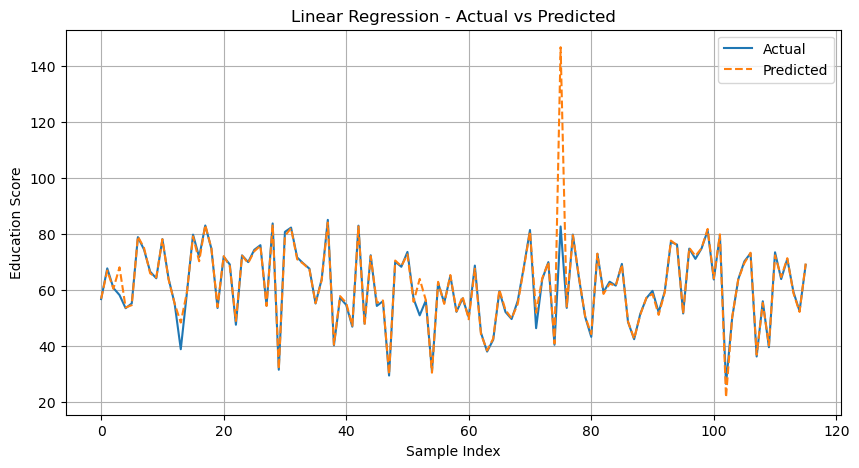

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
sse = mse * len(y_test)  # Sum of Squared Errors

# Print evaluation metrics
print("Linear Regression Evaluation Metrics:")
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"SSE: {sse:.2f}")
print(f"R² Score: {r2:.2f}")

# Plot Actual vs Predicted values
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted', linestyle='--')
plt.title('Linear Regression - Actual vs Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Education Score')
plt.legend()
plt.grid(True)
plt.show()

#### **Linear Regression Evaluation:-**

**Evaluation Metrics:-**

- Mean Squared Error (MSE): 39.16

    - MSE measures the average squared difference between the predicted and actual values. A lower MSE indicates better performance. In this case, a value of 40.74 means the predictions have a moderate level of error.

- Mean Absolute Error (MAE): 1.34

    - MAE gives the average absolute difference between predicted and actual values. It’s easy to interpret and indicates that, on average, our predictions are off by 1.70 units.

- Sum of Squared Errors (SSE): 4542.25

    - SSE is the total squared error over all predictions. It provides a sense of total model error, with larger values indicating greater deviation from the actual data.

- R² Score: 0.78

    - The R² score (coefficient of determination) indicates that 78% of the variance in the target variable is explained by the linear regression model. This is a decent fit but suggests there's still room for improvement.

#### **2) Random Forest Regressor**

Random Forest improves accuracy and reduces overfitting compared to a single decision tree.
It is a strong choice for our project alongside Linear Regression, providing a good contrast between simple and complex models.

Random Forest Regression Evaluation Metrics:
MSE: 7.11
MAE: 1.95
SSE: 824.72
R² Score: 0.96


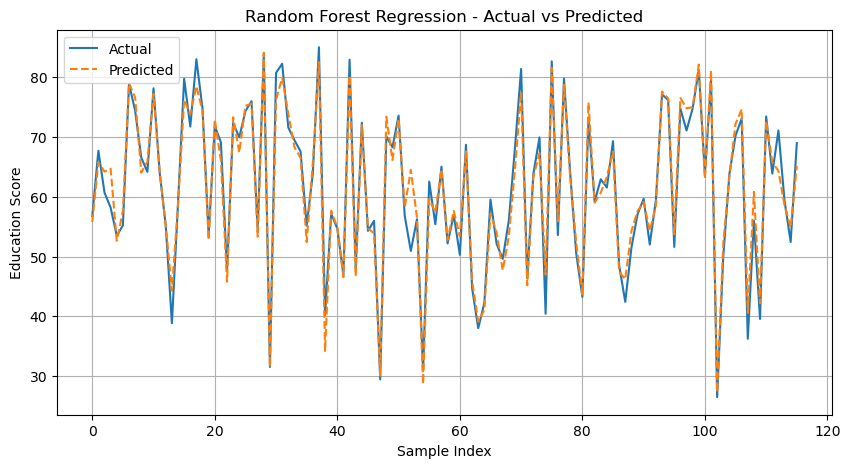

['literacy_model.pkl']

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Train the model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred_rf)
mae = mean_absolute_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)
sse = mse * len(y_test)

# Print evaluation metrics
print("Random Forest Regression Evaluation Metrics:")
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"SSE: {sse:.2f}")
print(f"R² Score: {r2:.2f}")

# Plot Actual vs Predicted values
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_rf, label='Predicted', linestyle='--')
plt.title('Random Forest Regression - Actual vs Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Education Score')
plt.legend()
plt.grid(True)
plt.show()

# Save the model
joblib.dump(rf_model, 'literacy_model.pkl') 

#### **Random Forest Regression Evaluation**

**Evaluation Metrics:-**

- Mean Squared Error (MSE): 7.11
    - The Random Forest model significantly reduces the MSE compared to linear regression, suggesting much more accurate predictions.

- Mean Absolute Error (MAE): 1.95
    - The MAE is slightly higher than the linear regression model, indicating slightly larger average errors in absolute terms, but overall performance is still strong.

- Sum of Squared Errors (SSE): 824.72
    - This is much lower than that of the linear model, showing a substantial decrease in total prediction error.

- R² Score: 0.96
    - An R² score of 0.96 means that 96% of the variance in the target is explained by the model. This is an excellent score and indicates that the random forest model captures the underlying patterns in the data very effectively.

## **LAB # 12: PREDICTIONS ON PROJECT BY USER INPUT (Phase # 05)**

In this lab, we deployed our trained Random Forest Regressor to predict literacy rates based on user-provided inputs.

- Loaded the trained model and saved encoders.
- Took user input for key features (like Province, EduClass, Region, UtilityScore, etc.).
- Encoded categorical inputs using previously saved LabelEncoders.
- Passed the cleaned, numeric data into the model to generate a prediction.

This demonstrates how our model can be used for real-time or scenario-based predictions to support education planning and strategy.
(.pkl files created: literacy_model.pkl, le_city.pkl, le_province.pkl, le_educlass.pkl, le_region.pkl)

In [77]:
import pandas as pd
import numpy as np
import joblib

# Load trained model and encoders
model = joblib.load('models/literacy_model.pkl')
le_province = joblib.load('models/le_province.pkl')
le_educlass = joblib.load('models/le_educlass.pkl')
le_city = joblib.load('models/le_city.pkl')

# Create empty input row based on model's expected features
expected_features = model.feature_names_in_
user_df = pd.DataFrame([np.zeros(len(expected_features))], columns=expected_features)

# Show options to guide user input
print("Available Provinces:", list(le_province.classes_))
print("Available EduClass:", list(le_educlass.classes_))
print("Available Cities:", list(le_city.classes_))

# Get user input
province = input("Enter Province: ").strip()
educlass = input("Enter EduClass (High, Medium, Low): ").strip()
city = input("Enter City: ").strip()

if province not in le_province.classes_ or educlass not in le_educlass.classes_ or city not in le_city.classes_:
    print("Invalid input. Please enter values exactly as shown.")
    exit()

budget = float(input("Enter Budget: "))
teachers = int(input("Enter Number of Teachers: "))
schools = int(input("Enter Number of Schools: "))
students = int(input("Enter Number of Students: "))
population = int(input("Enter Population: "))

# Encode categorical values
user_df['Province_encoded'] = le_province.transform([province])[0]
user_df['EduClass_encoded'] = le_educlass.transform([educlass])[0]
user_df['City_Code'] = le_city.transform([city])[0]

# Fill directly known inputs
for col, val in {
    'Budget': budget,
    'Teachers': teachers,
    'Schools': schools,
    'Students': students,
    'Population': population
}.items():
    if col in user_df.columns:
        user_df[col] = val

# Fill average literacy-related values for this province
avg = ed_p3[ed_p3['Province'] == province].mean(numeric_only=True)
for col in ['RetentionScore', 'LearningScore', 'GenderParityScore',
            'SchoolInfrastructureScore', 'EnrolmentScore', 'Student_School_Ratio']:
    user_df[col] = avg.get(col, 0)

# Compute utility score internally (using existing function)
utility_score = compute_utility(user_df.iloc[0])
if 'Utility' in user_df.columns:
    user_df.at[0, 'Utility'] = utility_score
print(f"\nComputed Utility Score: {utility_score:.4f}")

# Final prediction
predicted_lit = model.predict(user_df)[0]
print(f"\nPredicted Literacy Rate: {predicted_lit:.2f}%")

Available Provinces: ['AJK', 'Balochistan', 'FATA', 'GB', 'ICT', 'KP', 'Punjab', 'Sindh']
Available EduClass: ['High', 'Low', 'Medium']
Available Cities: ['Abbottabad', 'Astor', 'Attock', 'Awaran', 'Badin', 'Bagh', 'Bahawalnagar', 'Bahawalpur', 'Bajaur Agency', 'Bannu', 'Barkhan', 'Batagram', 'Bhakkar', 'Bhimber', 'Buner', 'Chaghi', 'Chakwal', 'Charsadda', 'Chiniot', 'Chitral', 'Dadu', 'Dera Bugti', 'Dera Ghazi Khan', 'Dera Ismail Khan', 'Diamir', 'FR Bannu', 'FR DI Khan', 'FR Kohat', 'FR Lakki Marwat', 'FR Peshawar', 'FR Tank', 'Faisalabad', 'Ghanchi', 'Ghizer', 'Ghotki', 'Gilgit', 'Gujranwala', 'Gujrat', 'Gwadar', 'Hafizabad', 'Hangu', 'Haripur', 'Harnai', 'Hattian', 'Haveli', 'Hunza Nagar', 'Hyderabad', 'Islamabad', 'Jacobabad', 'Jaffarabad', 'Jamshoro', 'Jhal Magsi', 'Jhang', 'Jhelum', 'Kachhi', 'Kalat', 'Kambar-Shahdadkot', 'Karachi', 'Karak', 'Kashmore-Kandhkot', 'Kasur', 'Kech', 'Khairpur', 'Khanewal', 'Kharan', 'Khushab', 'Khuzdar', 'Khyber Agency', 'Killa Abdullah', 'Killa Sai

Enter Province:  Punjab
Enter EduClass (High, Medium, Low):  Medium
Enter City:  Lahore
Enter Budget:  450000
Enter Number of Teachers:  50
Enter Number of Schools:  65
Enter Number of Students:  15000
Enter Population:  13004135



Computed Utility Score: 61.6476

Predicted Literacy Rate: 31.20%


#### **Sample Prediction – User Input Simulation**

A sample prediction was performed by collecting input directly from the user. The model requested the following values:

- **Available Provinces:** AJK, Balochistan, FATA, GB, ICT, KP, Punjab, Sindh  
- **Available EduClass:** High, Medium, Low  
- **Available Cities:** 130+ unique city names (e.g., Karachi, Lahore, Mardan, Gilgit, etc.)

**User Inputs:-**
- `Province`  
- `EduClass`  
- `City`  
- `Budget`
- `Teachers`  
- `Schools`  
- `Students`  
- `Population`

The model used province-level averages for additional educational indicators (like `RetentionScore`, `LearningScore`, etc.), and computed the **Utility Score** using a custom function.

**Results:-**
- Computed Utility Score
- Predicted Literacy Rate

This demonstrates how the system can dynamically take input from any district, compute derived metrics like utility, and return a data-driven prediction to guide educational planning.

## **LAB # 13: NEURAL NETWORKS (Phase # 06)**

In this lab, we will explore neural networks using TensorFlow/Keras to model the literacy rate based on educational and demographic features. We studied various activation functions including ReLU, and sigmoid, and analyzed their mathematical behavior and practical applications.

**Activation Functions:-**

We studied and implemented two commonly used activation functions:

- ReLU (Rectified Linear Unit): Outputs `x` if `x > 0`, else `0`. It's efficient and commonly used in hidden layers due to its ability to avoid the vanishing gradient problem.
- Sigmoid: Outputs values between `0` and `1`. While useful in binary classification, it can saturate and slow training in deep networks.

For regression problems, the output layer uses Linear Activation, allowing any real value as output.

Both activation functions were tested on our education dataset to predict `EducationScore`.

In [73]:
# Neural Networks
import pandas as pd
import numpy as np

# working on a copy of 'ed_p3'
ed_p4 = ed_p3.copy()  

In [74]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


#### **Model Evaluation Summary**

| Activation | MSE    | MAE   |
|------------|--------|-------|
| ReLU       | 12.57  | 2.80  |
| Sigmoid    | 235.94 | 11.90 |

**ReLU clearly outperformed Sigmoid**, confirming its effectiveness in handling regression tasks. The Sigmoid model likely suffered from vanishing gradients, leading to poor convergence and large prediction errors.


In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# ReLU Model (no warning)
nn_model_relu = Sequential([
    Input(shape=(X_train_nn.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

nn_model_relu.compile(optimizer=Adam(), loss='mse', metrics=['mae'])
history_relu = nn_model_relu.fit(
    X_train_nn, y_train_nn,
    epochs=100,
    batch_size=16,
    validation_split=0.2,
    verbose=0
)
loss_relu, mae_relu = nn_model_relu.evaluate(X_test_nn, y_test_nn)
print(f"ReLU Model → MSE: {loss_relu:.2f} | MAE: {mae_relu:.2f}")

# Sigmoid Model (no warning)
nn_model_sigmoid = Sequential([
    Input(shape=(X_train_nn.shape[1],)),
    Dense(64, activation='sigmoid'),
    Dense(32, activation='sigmoid'),
    Dense(1, activation='linear')
])

nn_model_sigmoid.compile(optimizer=Adam(), loss='mse', metrics=['mae'])
history_sigmoid = nn_model_sigmoid.fit(
    X_train_nn, y_train_nn,
    epochs=100,
    batch_size=16,
    validation_split=0.2,
    verbose=0
)
loss_sigmoid, mae_sigmoid = nn_model_sigmoid.evaluate(X_test_nn, y_test_nn)
print(f"Sigmoid Model → MSE: {loss_sigmoid:.2f} | MAE: {mae_sigmoid:.2f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 13.4053 - mae: 2.7529
ReLU Model → MSE: 14.20 | MAE: 2.90
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 381.6651 - mae: 16.2183
Sigmoid Model → MSE: 353.21 | MAE: 15.41


### **Neural Network Results – ReLU vs Sigmoid Activation**

Two neural networks were trained on the scaled dataset using different activation functions to analyze their impact on predicting `EducationScore`.

#### **Model Architecture (Same for Both):-**
- Input: All numeric features from the cleaned dataset (after dropping raw object columns)
- Hidden Layers: 
  - Layer 1: 64 neurons
  - Layer 2: 32 neurons
- Output Layer: 1 neuron (with linear activation, suitable for regression)
- Optimizer: Adam
- Loss Function: Mean Squared Error (MSE)
- Metric: Mean Absolute Error (MAE)

#### **Evaluation Results:-**

| Model Type | Hidden Activation | MSE    | MAE    |
|------------|-------------------|--------|--------|
| **ReLU**   | ReLU              | 14.20  | 2.90   |
| **Sigmoid**| Sigmoid           | 353.21 | 15.41  |


#### **Conclusion:-**
- The **ReLU-based neural network clearly outperformed** the Sigmoid-based model.
- The Sigmoid model performed poorly, likely due to the vanishing gradient problem and activation saturation, especially in deeper layers.
- This result aligns with deep learning best practices, where ReLU is preferred for hidden layers in regression tasks due to faster convergence and better gradient flow.

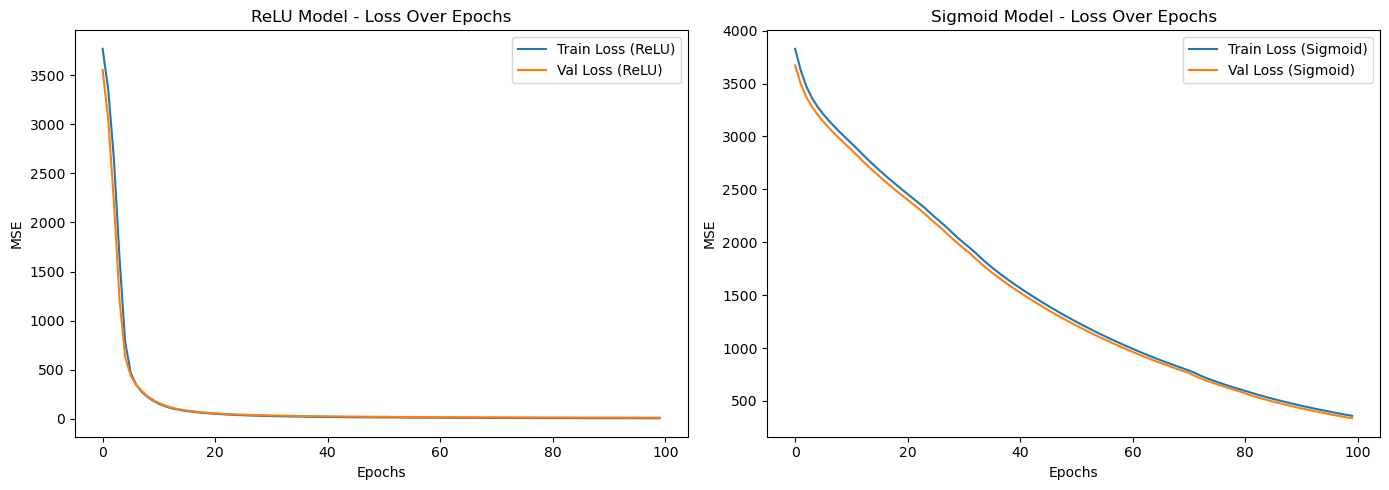

In [84]:
# Mean Squared Error MSE Curve
import matplotlib.pyplot as plt

# Plot training & validation loss
plt.figure(figsize=(14, 5))

# ReLU Model
plt.subplot(1, 2, 1)
plt.plot(history_relu.history['loss'], label='Train Loss (ReLU)')
plt.plot(history_relu.history['val_loss'], label='Val Loss (ReLU)')
plt.title('ReLU Model - Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()

# Sigmoid Model
plt.subplot(1, 2, 2)
plt.plot(history_sigmoid.history['loss'], label='Train Loss (Sigmoid)')
plt.plot(history_sigmoid.history['val_loss'], label='Val Loss (Sigmoid)')
plt.title('Sigmoid Model - Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()

plt.tight_layout()
plt.show()

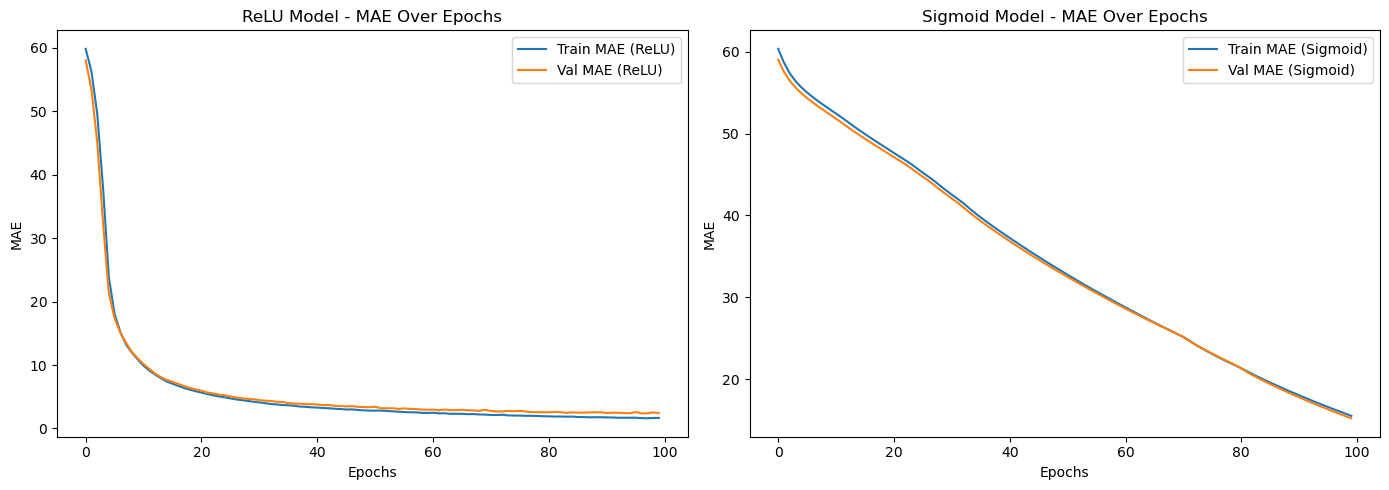

In [85]:
# Mean Absolute Error MAE Curve
# Plot MAE
plt.figure(figsize=(14, 5))

# ReLU MAE
plt.subplot(1, 2, 1)
plt.plot(history_relu.history['mae'], label='Train MAE (ReLU)')
plt.plot(history_relu.history['val_mae'], label='Val MAE (ReLU)')
plt.title('ReLU Model - MAE Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

# Sigmoid MAE
plt.subplot(1, 2, 2)
plt.plot(history_sigmoid.history['mae'], label='Train MAE (Sigmoid)')
plt.plot(history_sigmoid.history['val_mae'], label='Val MAE (Sigmoid)')
plt.title('Sigmoid Model - MAE Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()


#### **MSE & MAE Curve Analysis**

The line plots above visualize the training and validation performance of the ReLU and Sigmoid neural networks across 100 epochs.

#### **Mean Squared Error (MSE) Curves:-**
- ReLU Model: Shows a steady decrease in both training and validation loss, indicating stable learning and generalization.
- Sigmoid Model: Initially decreases but plateaus quickly and remains high, suggesting poor convergence and potential vanishing gradient issues.

#### **Mean Absolute Error (MAE) Curves:-**
- ReLU Model: Demonstrates a consistent and gradual reduction in MAE, reinforcing that predictions are becoming more accurate over time.
- Sigmoid Model: Displays very high and fluctuating MAE values, reinforcing that it is not learning effectively in this regression setting.

#### **Conclusion:-**
- The ReLU model performs significantly better on both loss (MSE) and error (MAE) metrics.
- The Sigmoid model struggles due to its limitations with deeper architectures and continuous outputs.
- These curves visually confirm the numeric evaluation — **ReLU is the optimal activation function** for this education score prediction task.